## Importing Libraries

In [1]:
# imporitng dataframe & numpy array libraires
import pandas as pd
import numpy as np

# libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,4)
plt.rcParams['figure.dpi'] = 300
sns.set_theme(style='darkgrid', palette='Set1')
# warnings to ignore warnings
import warnings 
warnings.filterwarnings('ignore')

# class for standardization
from sklearn.preprocessing import StandardScaler

# class for hierarchical, k-means, DBSCAN clustering
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN

#
from scipy.cluster import hierarchy

#valuation metrics for clustering
from sklearn.metrics import silhouette_score

# for finding optimal k vlue for k means clustering
from kneed import KneeLocator
from yellowbrick.cluster import KElbowVisualizer

## Data Dictionary
- This data set contains statistics, in arrests per 100,000 residents for assault, murder, and rape in each of the 50 US states in 1973. Also given is the percent of the population living in urban areas.
<br/><br/>
- A data frame with 50 observations on 4 variables.
<br/><br/>
- Murder is numeric and Murder arrests (per 100,000)
- Assault is numeric and Assault arrests (per 100,000)
- UrbanPop is numeric and UrbanPop arrests (per 100,000)
- Rape is numeric and Rape arrests (per 100,000)
<br/><br/>
- Source: World Almanac and Book of facts 1975. (Crime rates), Statistical Abstracts of the United States 1975. (Urban rates)

In [2]:
df = pd.read_csv('crime_data.csv')
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
df.rename(columns={'Unnamed: 0':'State'},inplace=True)

## Exploratory Data Analysis

In [4]:
df.shape

(50, 5)

In [5]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   State     50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [7]:
df.isna().sum()

State       0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

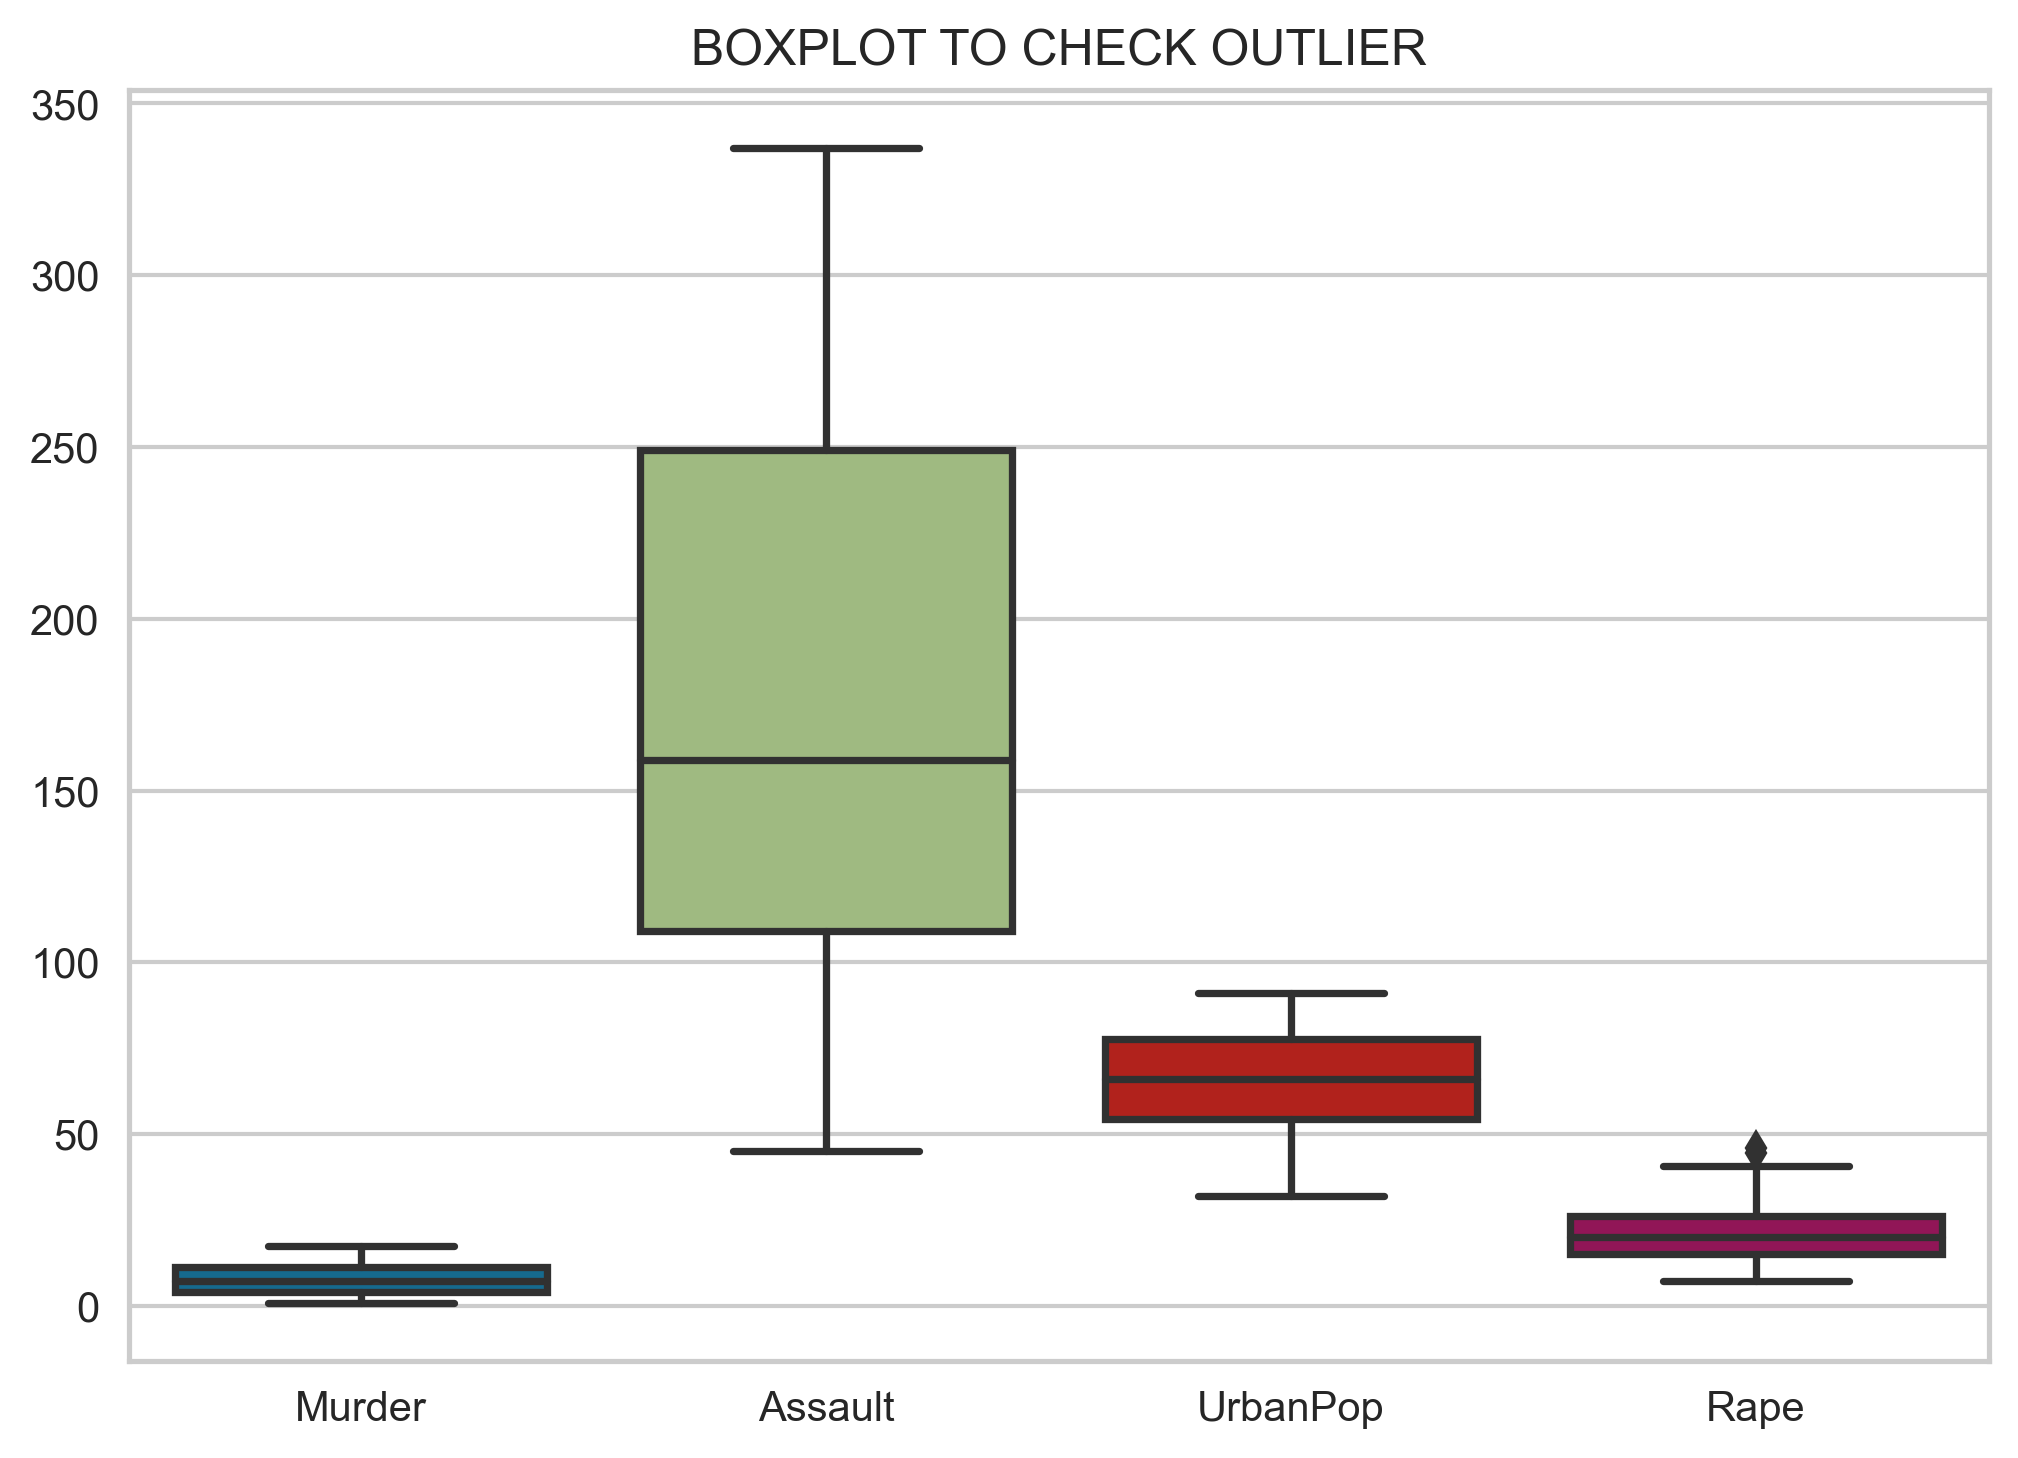

In [8]:
sns.boxplot(df)
plt.title('BOXPLOT TO CHECK OUTLIER')
plt.show()

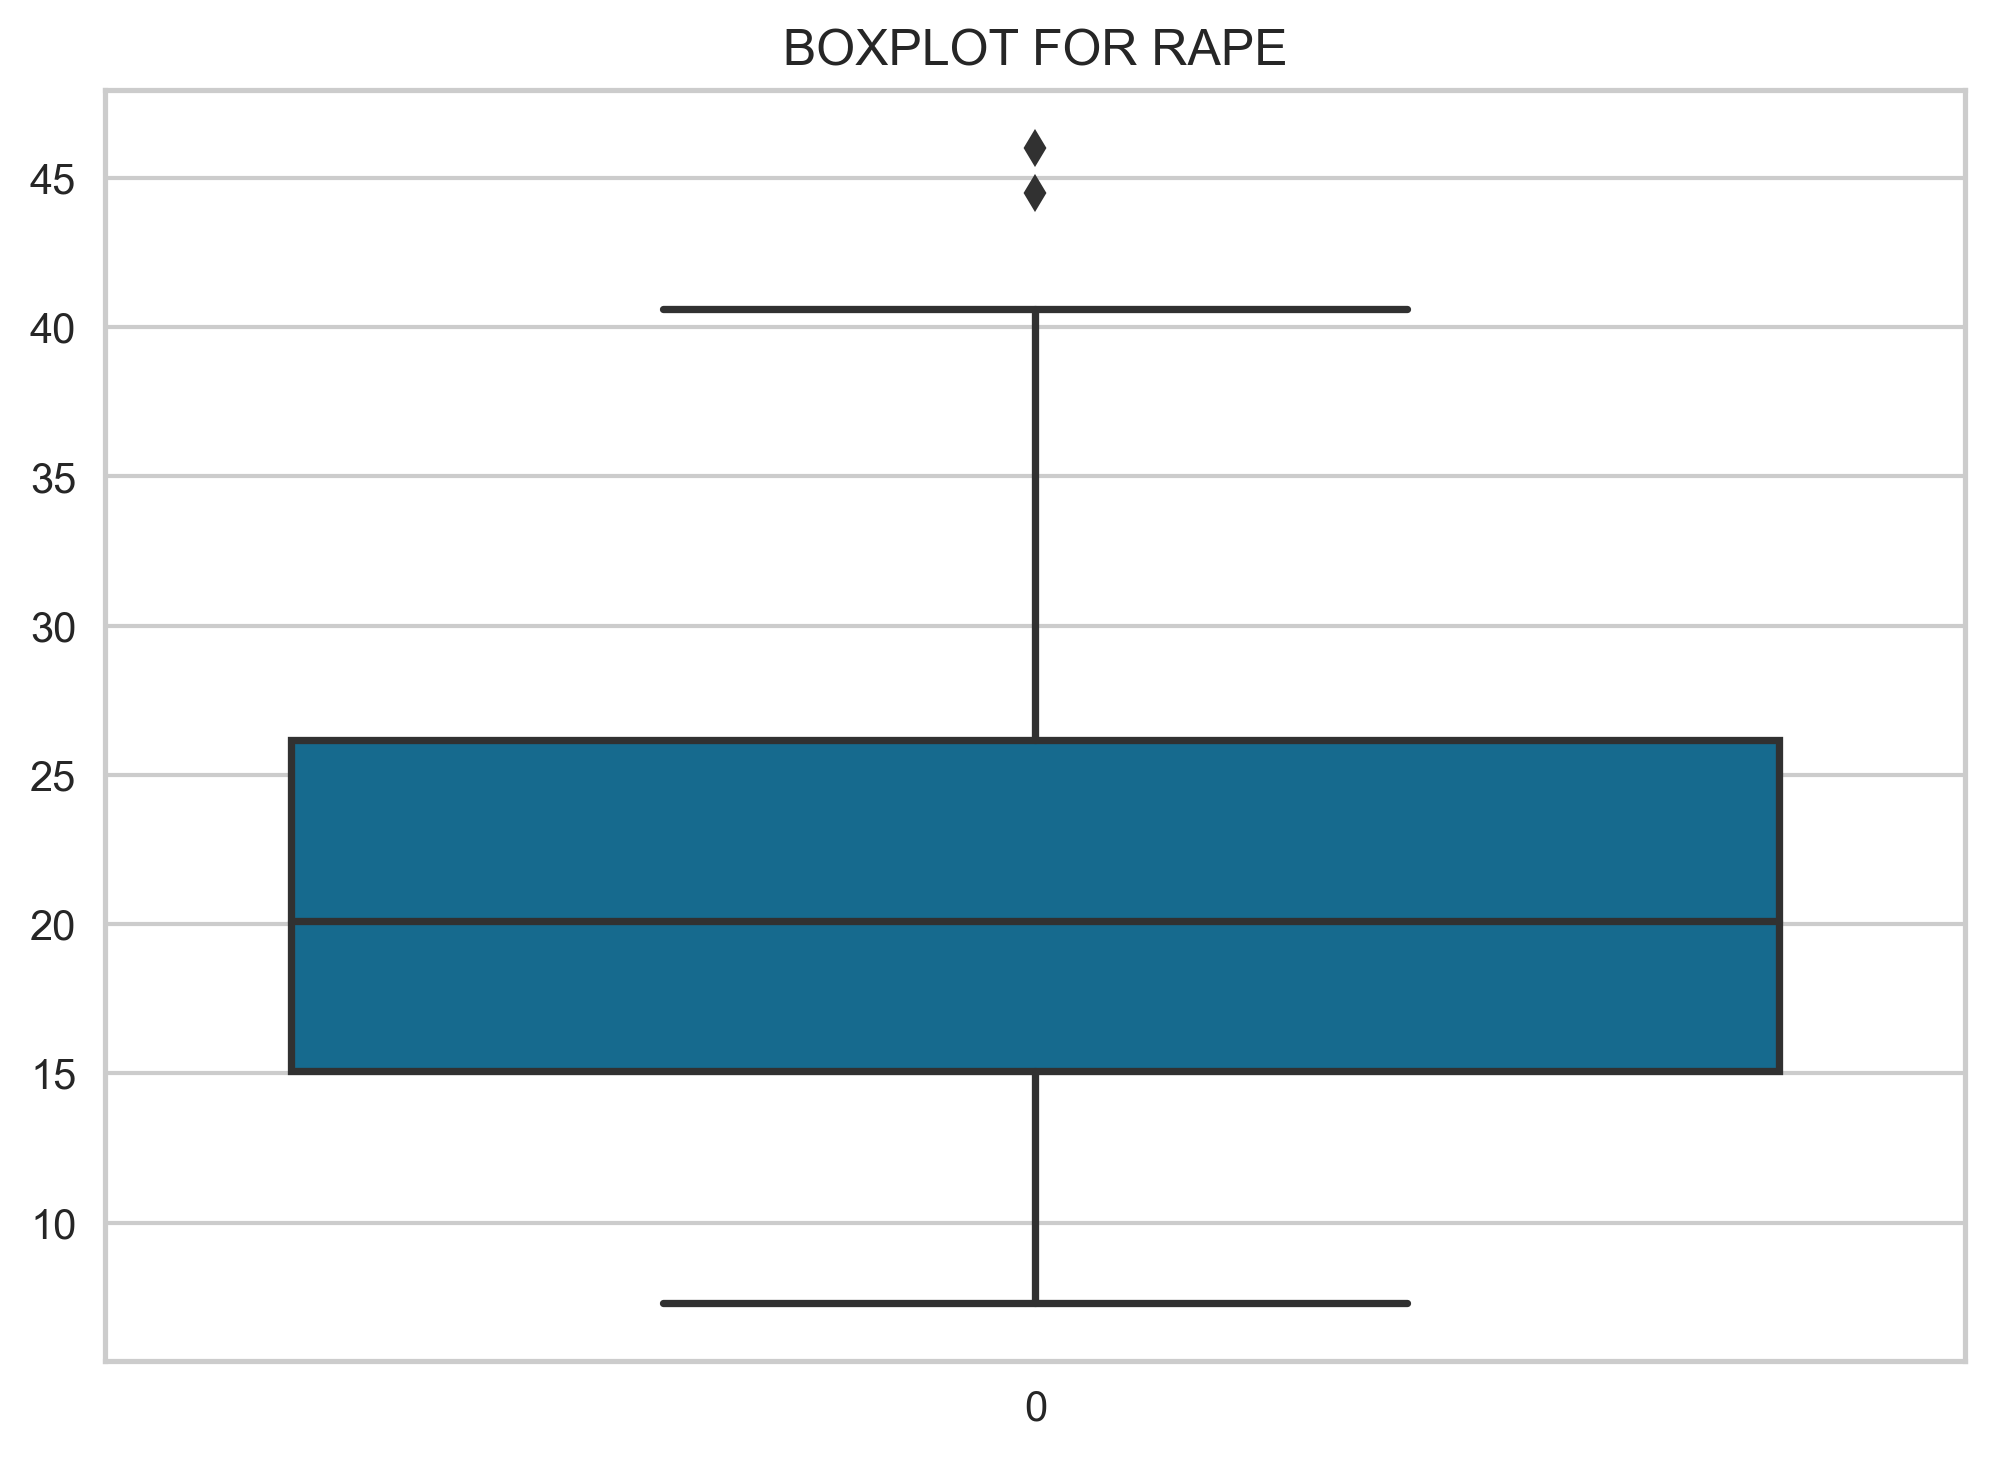

In [9]:
sns.boxplot(df['Rape'])
plt.title('BOXPLOT FOR RAPE')
plt.show()

Text(0.5, 1.05, 'PAIRPLOT FOR WHOLE DATASET')

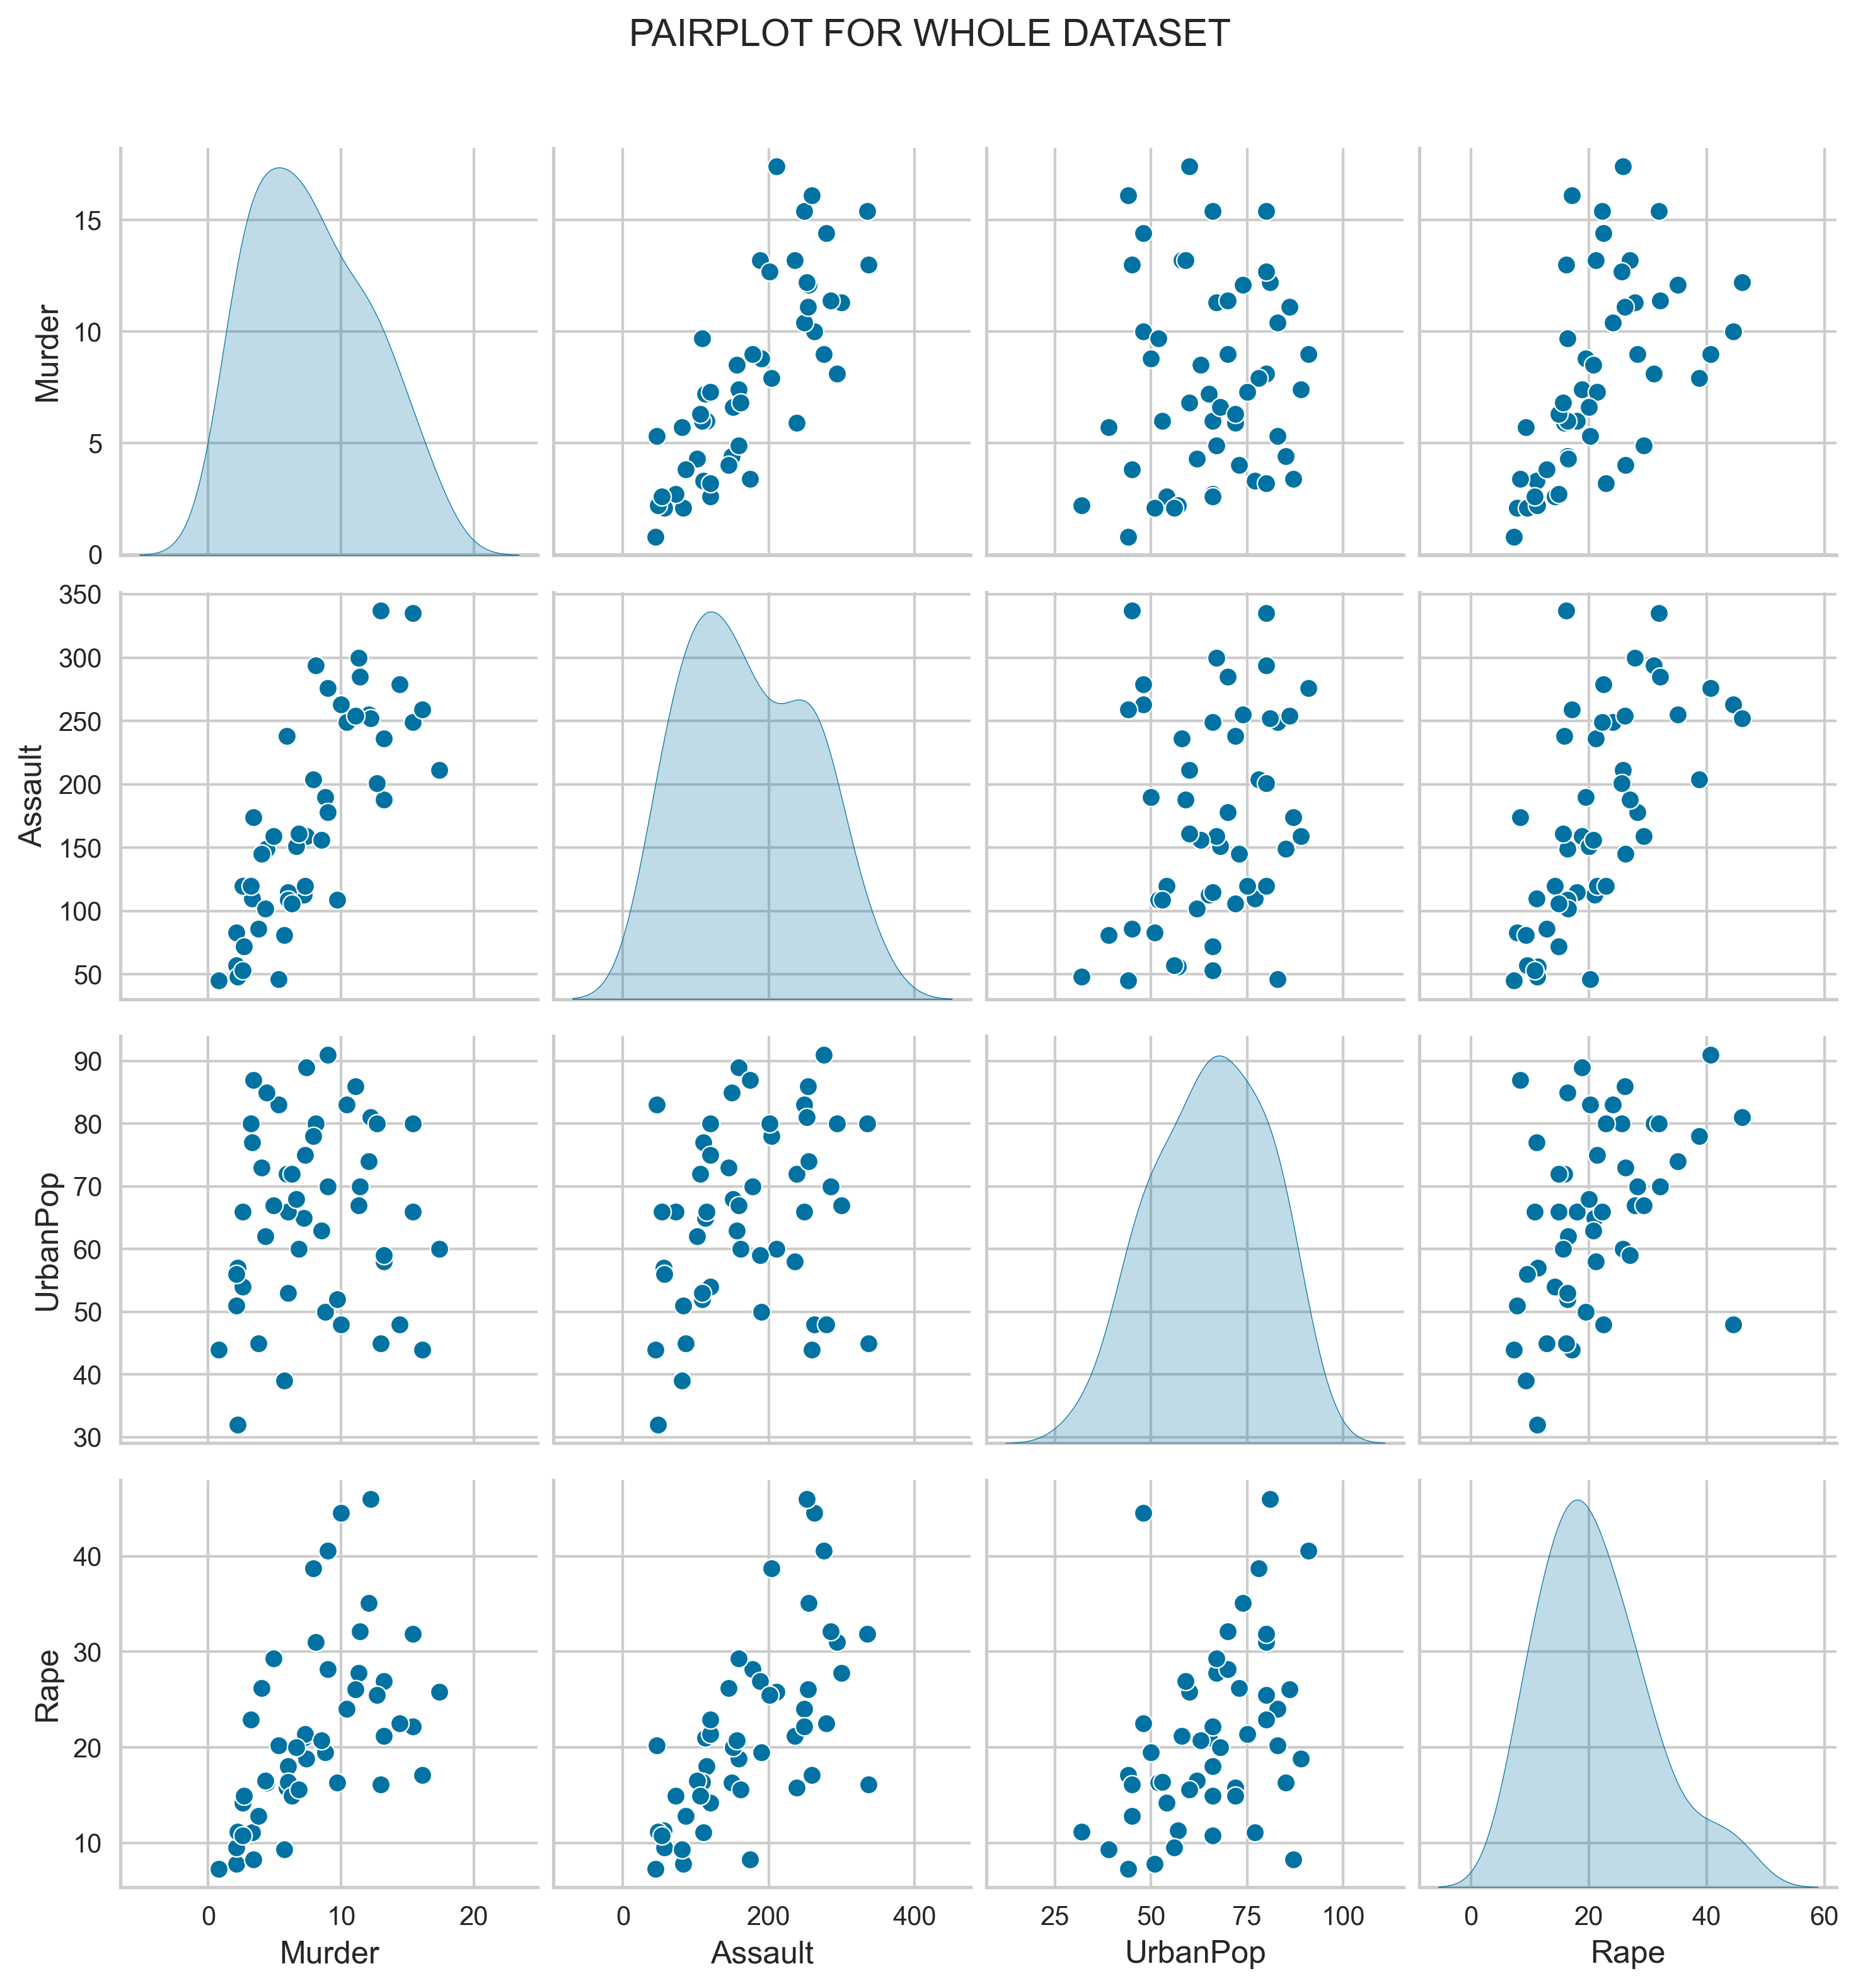

In [10]:
pp = sns.pairplot(df, diag_kind='kde')
pp.fig.suptitle('PAIRPLOT FOR WHOLE DATASET', y = 1.05)

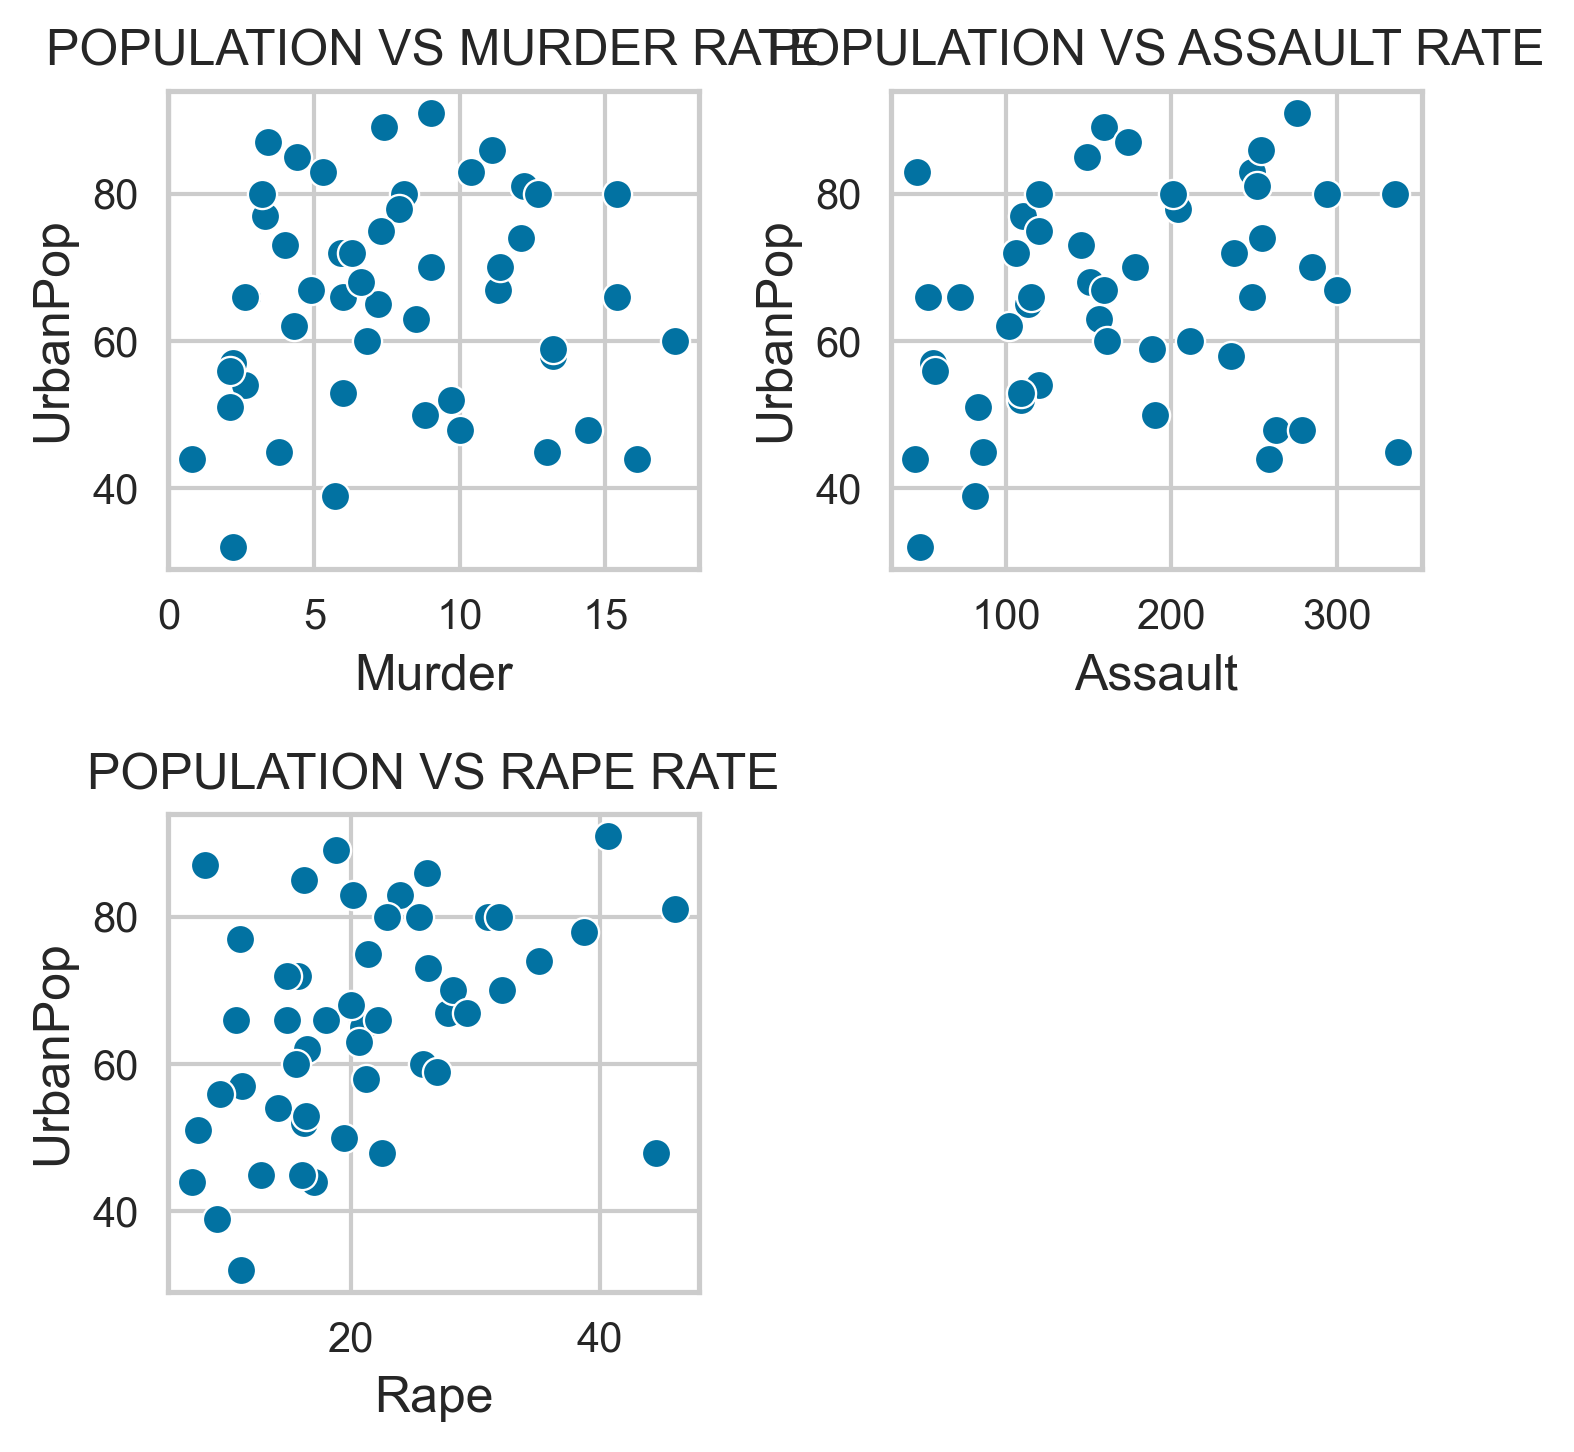

In [11]:
plt.figure(figsize=(5,5))
plt.subplot(2,2,1)
sns.scatterplot(data = df, y = 'UrbanPop', x = 'Murder')
plt.title('POPULATION VS MURDER RATE')
plt.subplot(2,2,2)
sns.scatterplot(data = df, y = 'UrbanPop', x = 'Assault')
plt.title('POPULATION VS ASSAULT RATE')
plt.subplot(2,2,3)
sns.scatterplot(data = df, y = 'UrbanPop', x = 'Rape')
plt.title('POPULATION VS RAPE RATE')
plt.tight_layout()

Text(0.5, 1.0, 'STATEWISE POPULATION')

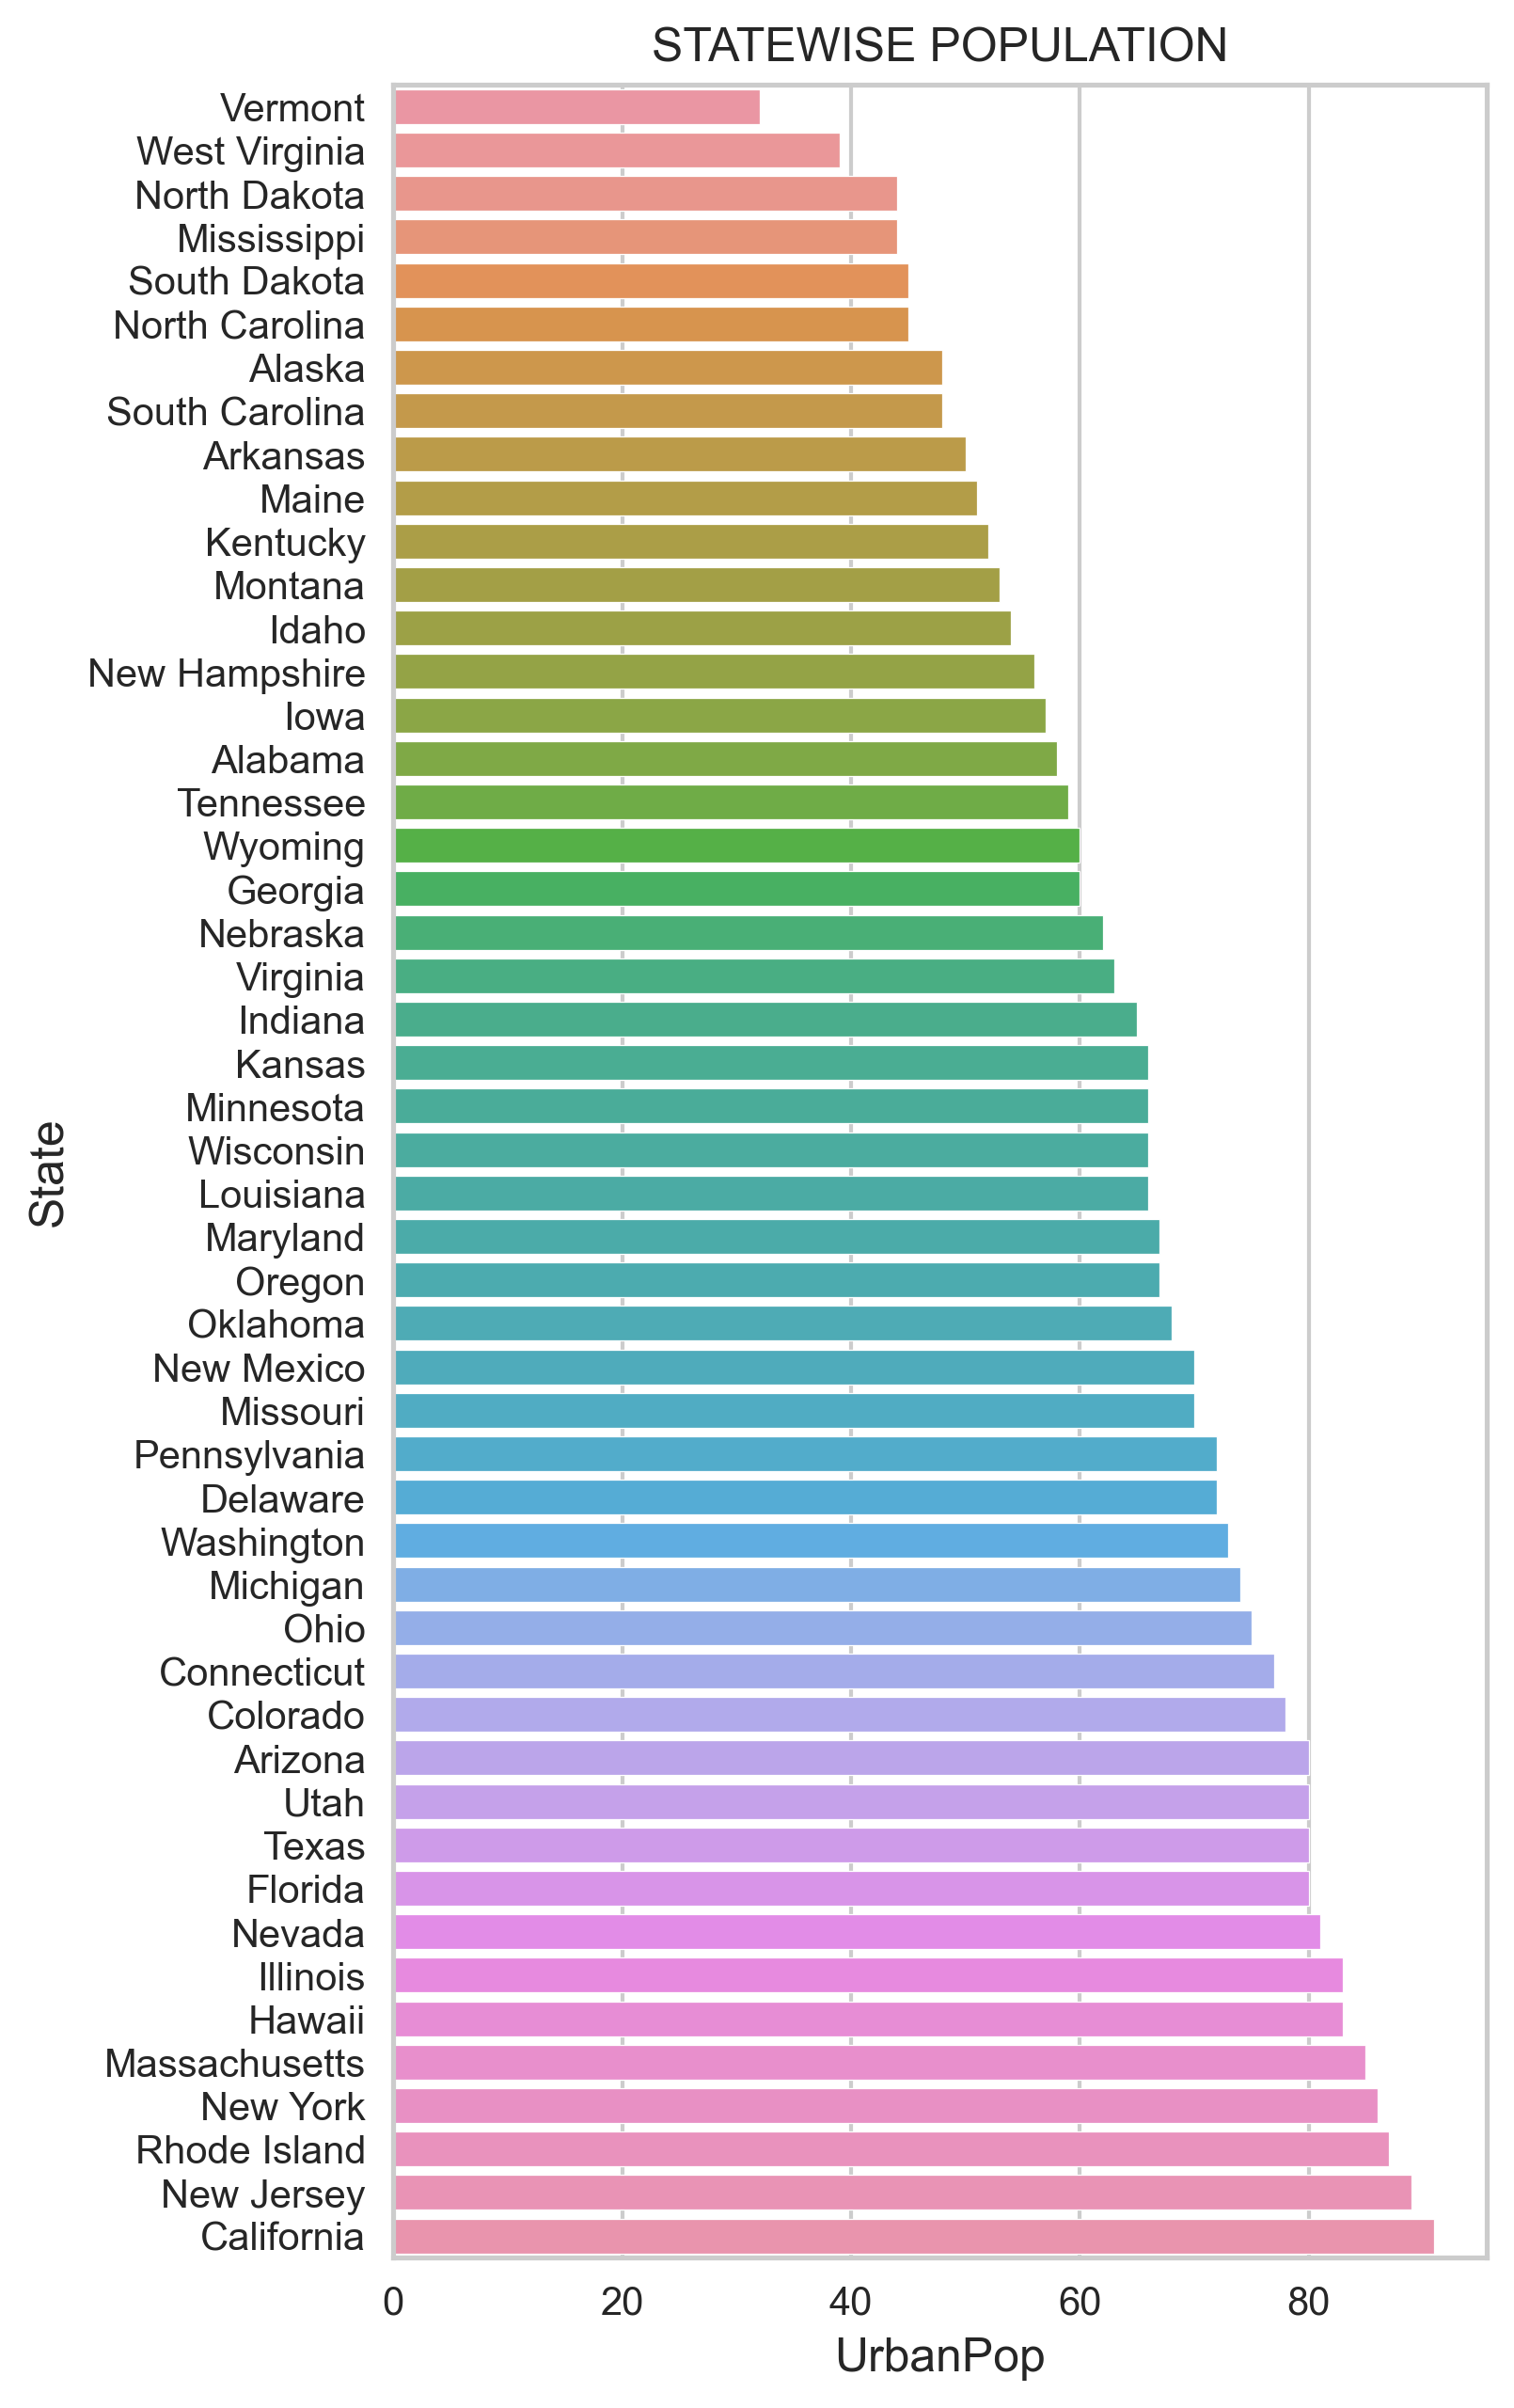

In [12]:
plt.figure(figsize=(5,10))
sns.barplot(data = df,x = 'UrbanPop', y = 'State', order=df.sort_values('UrbanPop').State)
plt.title('STATEWISE POPULATION')

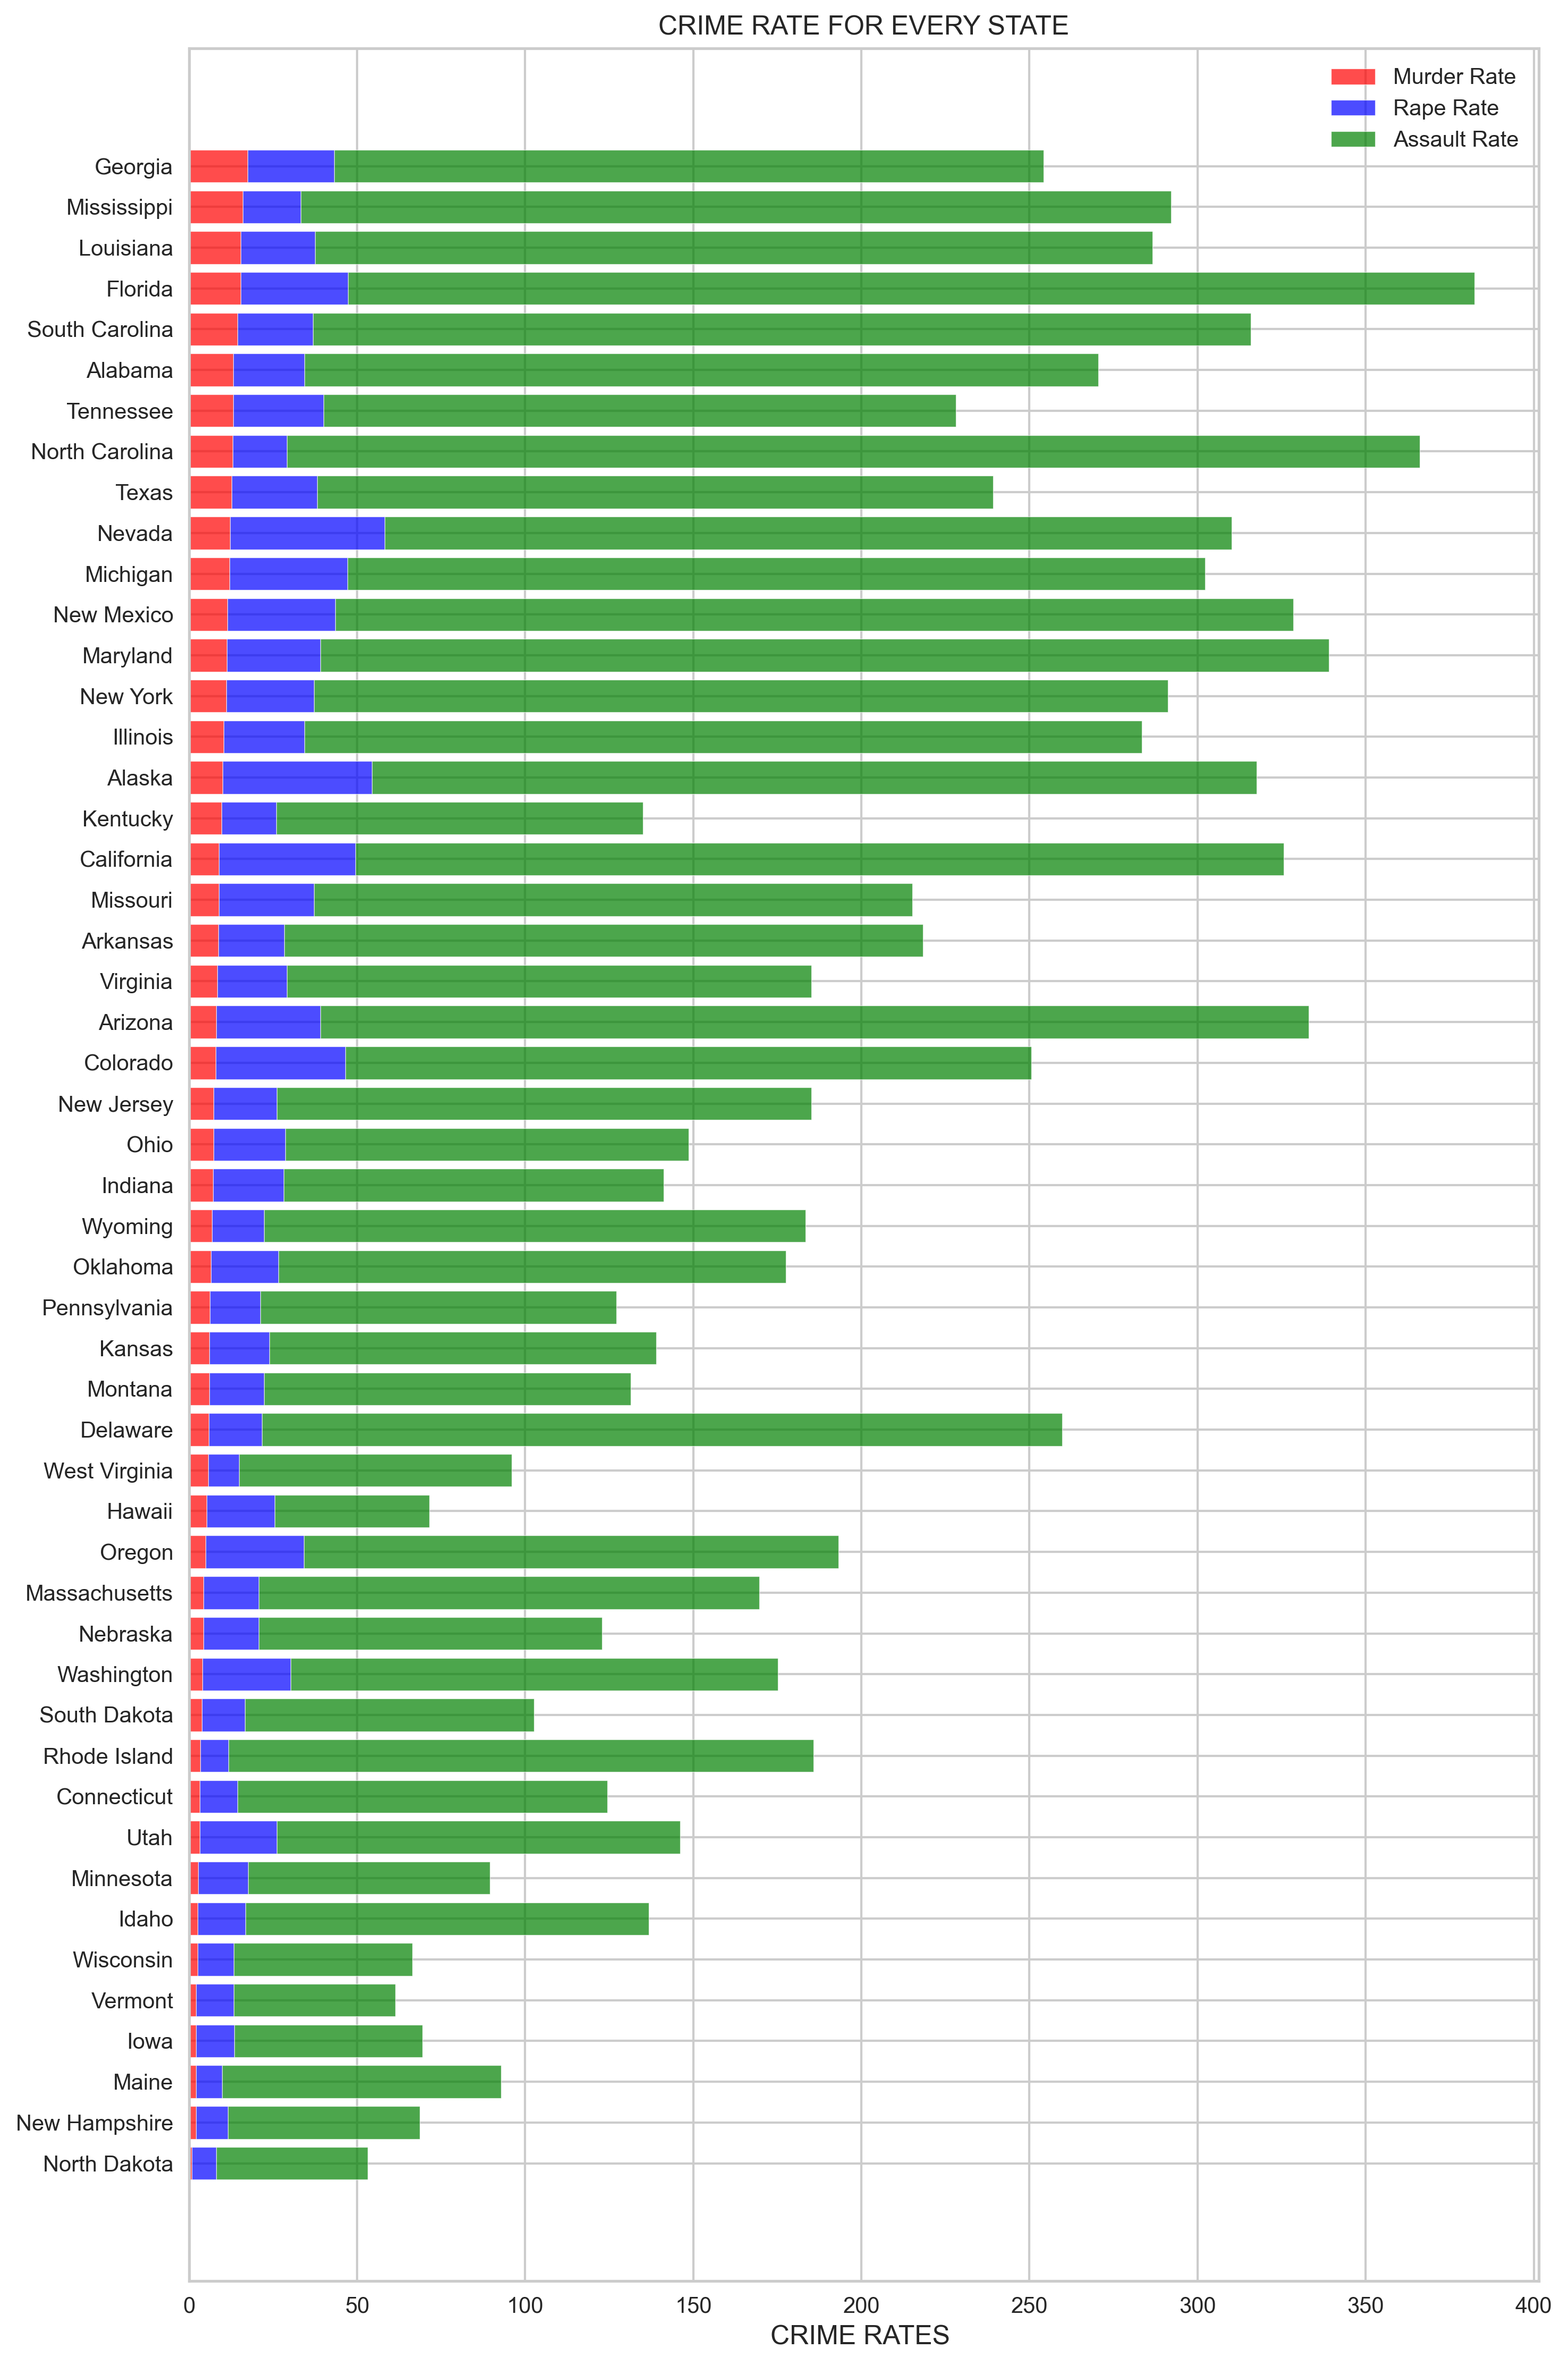

In [13]:
# Extract state names and rates

data_sorted = df.sort_values(by='Murder')

# Extract state names and rates
states = data_sorted['State']
murder_rates = data_sorted['Murder']
rape_rates = data_sorted['Rape']
assault_rates = data_sorted['Assault']

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 15))
# Plot murder rates
ax.barh(states, murder_rates, color='red', alpha=0.7, label='Murder Rate')
# Plot rape rates
ax.barh(states, rape_rates, left=murder_rates, color='blue', alpha=0.7, label='Rape Rate')
# Plot assault rates
ax.barh(states, assault_rates, left=[a + b for a, b in zip(murder_rates, rape_rates)], color='green', alpha=0.7, label='Assault Rate')

# Add labels and legend
ax.set_xlabel('CRIME RATES ')
ax.set_title('CRIME RATE FOR EVERY STATE')
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [14]:
print('MAX ASSAULT RATE\n',df.iloc[df['Assault'].argmax()])
print('\nMIN ASSAULT RATE\n',df.iloc[df['Assault'].argmin()])

print('MAX MURDER RATE\n',df.iloc[df['Murder'].argmax()])
print('\nMIN MURDER RATE\n',df.iloc[df['Murder'].argmin()])

print('MAX RAPE RATE\n',df.iloc[df['Rape'].argmax()])
print('\nMIN RAPE RATE\n',df.iloc[df['Rape'].argmin()])

MAX ASSAULT RATE
 State       North Carolina
Murder                13.0
Assault                337
UrbanPop                45
Rape                  16.1
Name: 32, dtype: object

MIN ASSAULT RATE
 State       North Dakota
Murder               0.8
Assault               45
UrbanPop              44
Rape                 7.3
Name: 33, dtype: object
MAX MURDER RATE
 State       Georgia
Murder         17.4
Assault         211
UrbanPop         60
Rape           25.8
Name: 9, dtype: object

MIN MURDER RATE
 State       North Dakota
Murder               0.8
Assault               45
UrbanPop              44
Rape                 7.3
Name: 33, dtype: object
MAX RAPE RATE
 State       Nevada
Murder        12.2
Assault        252
UrbanPop        81
Rape          46.0
Name: 27, dtype: object

MIN RAPE RATE
 State       North Dakota
Murder               0.8
Assault               45
UrbanPop              44
Rape                 7.3
Name: 33, dtype: object


## Exploratory Data Analysis Interpretation
- data doest not consist missing vlaues
- data is kind of normally distributed
- out of 3 numerical columns(Murder, Rape, Assault), Rape column consists outlier, we retain the outlier as its cirme related dat & number of outlier is less.
<br></br>
- from pairplot & scatterplot its observrd that the data is normally distributed, and there is a slight increasing trend between populaion & crime(Murder & rape)
- Vermont as the lowest population & california has the highest Population
- North Dakota has the minimum Murder, Assault & Rape crime rate
- Nevada has Maximum Rape cirme Rate
- Georgeia has maximum Murder Crime Rate
- North Carolina has maximum assault rate

In [32]:
# standardizing the data

sc = StandardScaler()
x = df.drop('State',axis = 1)
x = sc.fit_transform(x)

## hierarchical Clustering

**Linkage** - In hierarchical clustering, "linkage" refers to the method used to measure the distance or similarity between clusters when merging them into larger cluster
- **Single Linkage** - Single linkage measures the distance between the closest pair of data points in two clusters (one from each cluster),It tends to create long, elongated clusters and is sensitive to outliers.
- **Complete Linkage** - Complete linkage measures the distance between the farthest pair of data points in two clusters. It tends to create compact, spherical clusters and is less sensitive to outliers compared to single linkage.
- **Average Linkage** - Average linkage calculates the average distance between all pairs of data points in two clusters. It aims to create balanced clusters and is less affected by outliers compared to single linkage
- **Centroid Linkage** - Centroid linkage calculates the distance between the centroids (mean points) of two clusters. It's a computationally efficient method but can lead to non-spherical clusters
- **Ward Linkage** - Ward's linkage is based on the increase in variance when two clusters are merged. It minimizes the variance within the newly formed cluster, resulting in balanced and compact clusters. Ward's linkage is often preferred when the goal is to minimize intra-cluster variance.
<br></br>
**Dendrogram** - A dendrogram is a graphical representation commonly used in hierarchical clustering to visualize the hierarchy of clusters as they are formed during the clustering process. It provides a tree-like structure that shows how individual data points or clusters are gradually merged into larger clusters until all data points are grouped together into a single cluster. 

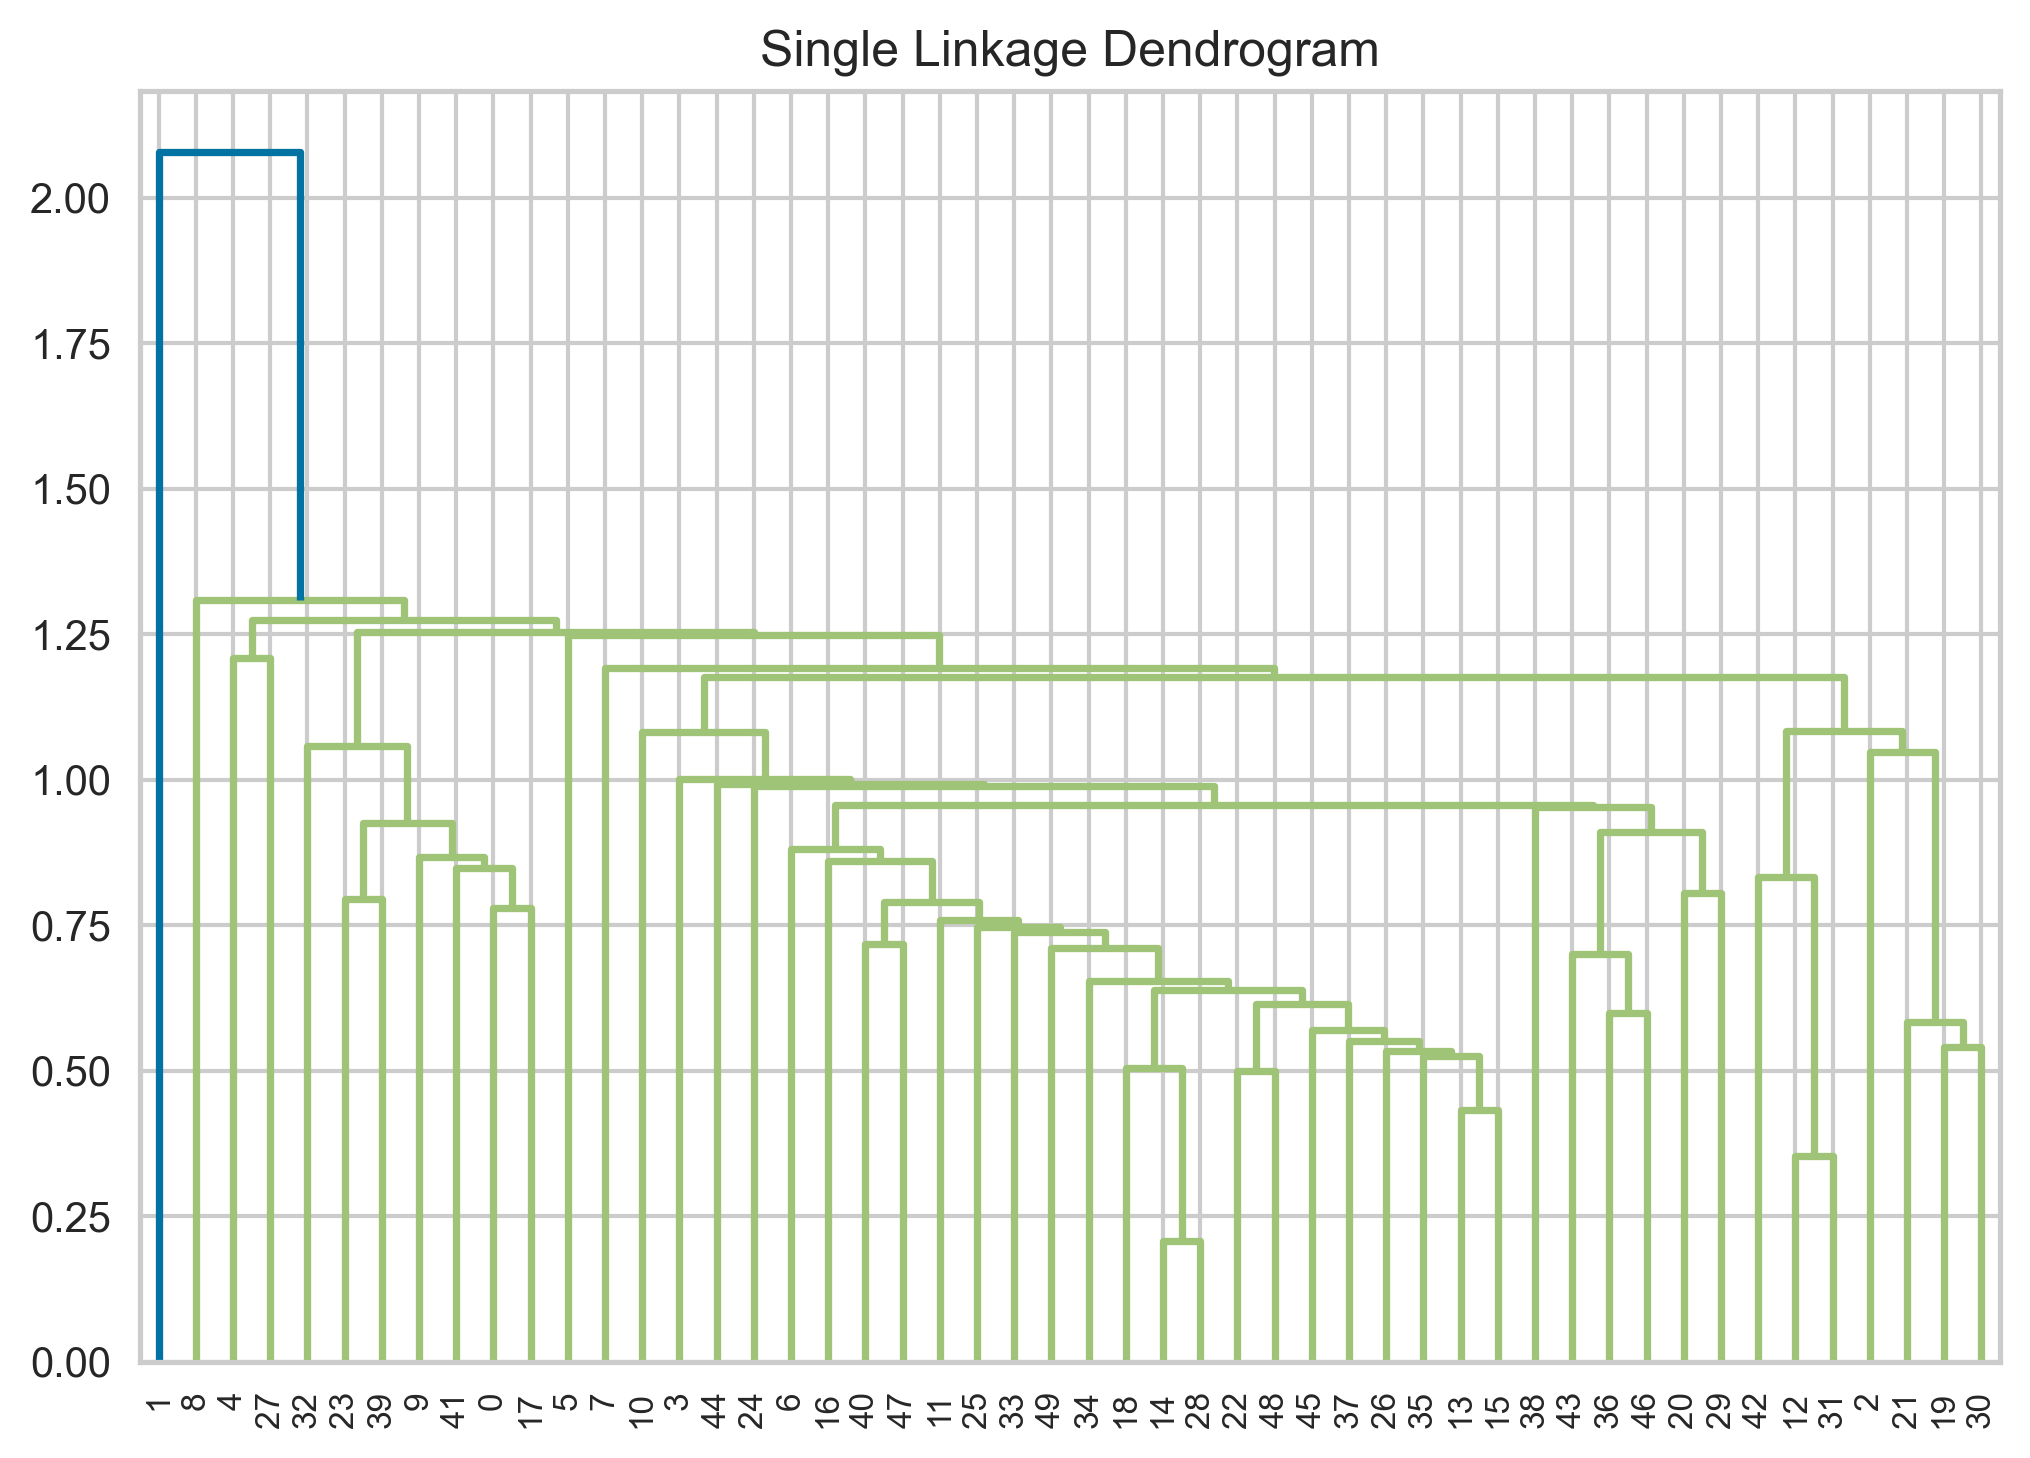

In [16]:
lk = hierarchy.linkage(x, method='single')
hierarchy.dendrogram(lk)
plt.title('Single Linkage Dendrogram')
plt.show()

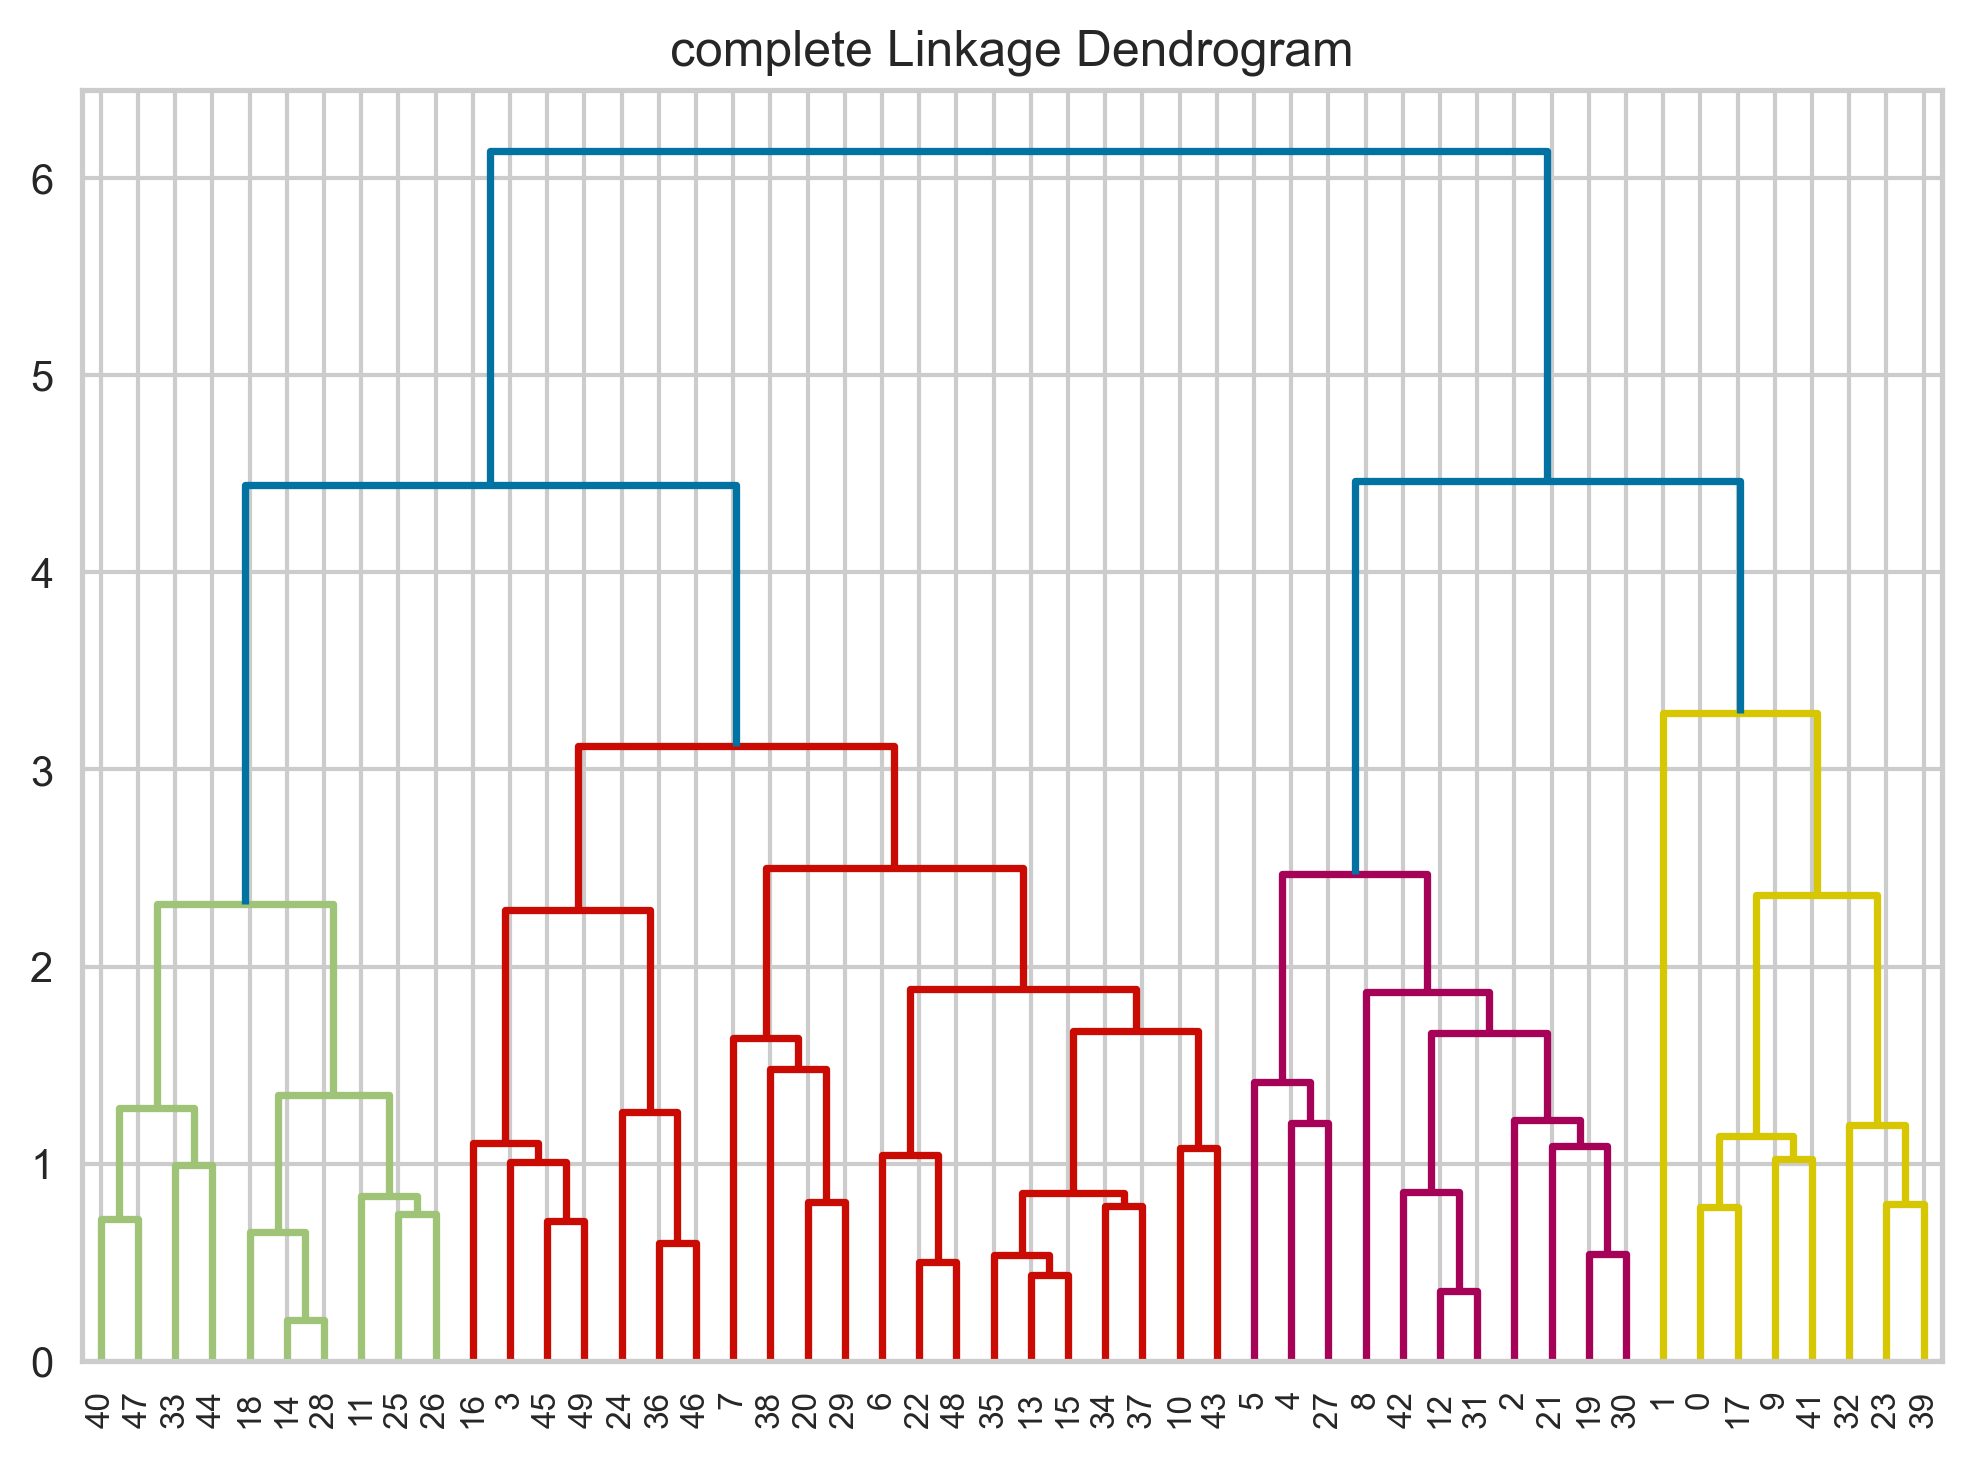

In [17]:
lk = hierarchy.linkage(x, method='complete')
hierarchy.dendrogram(lk)
plt.title('complete Linkage Dendrogram')
plt.show()


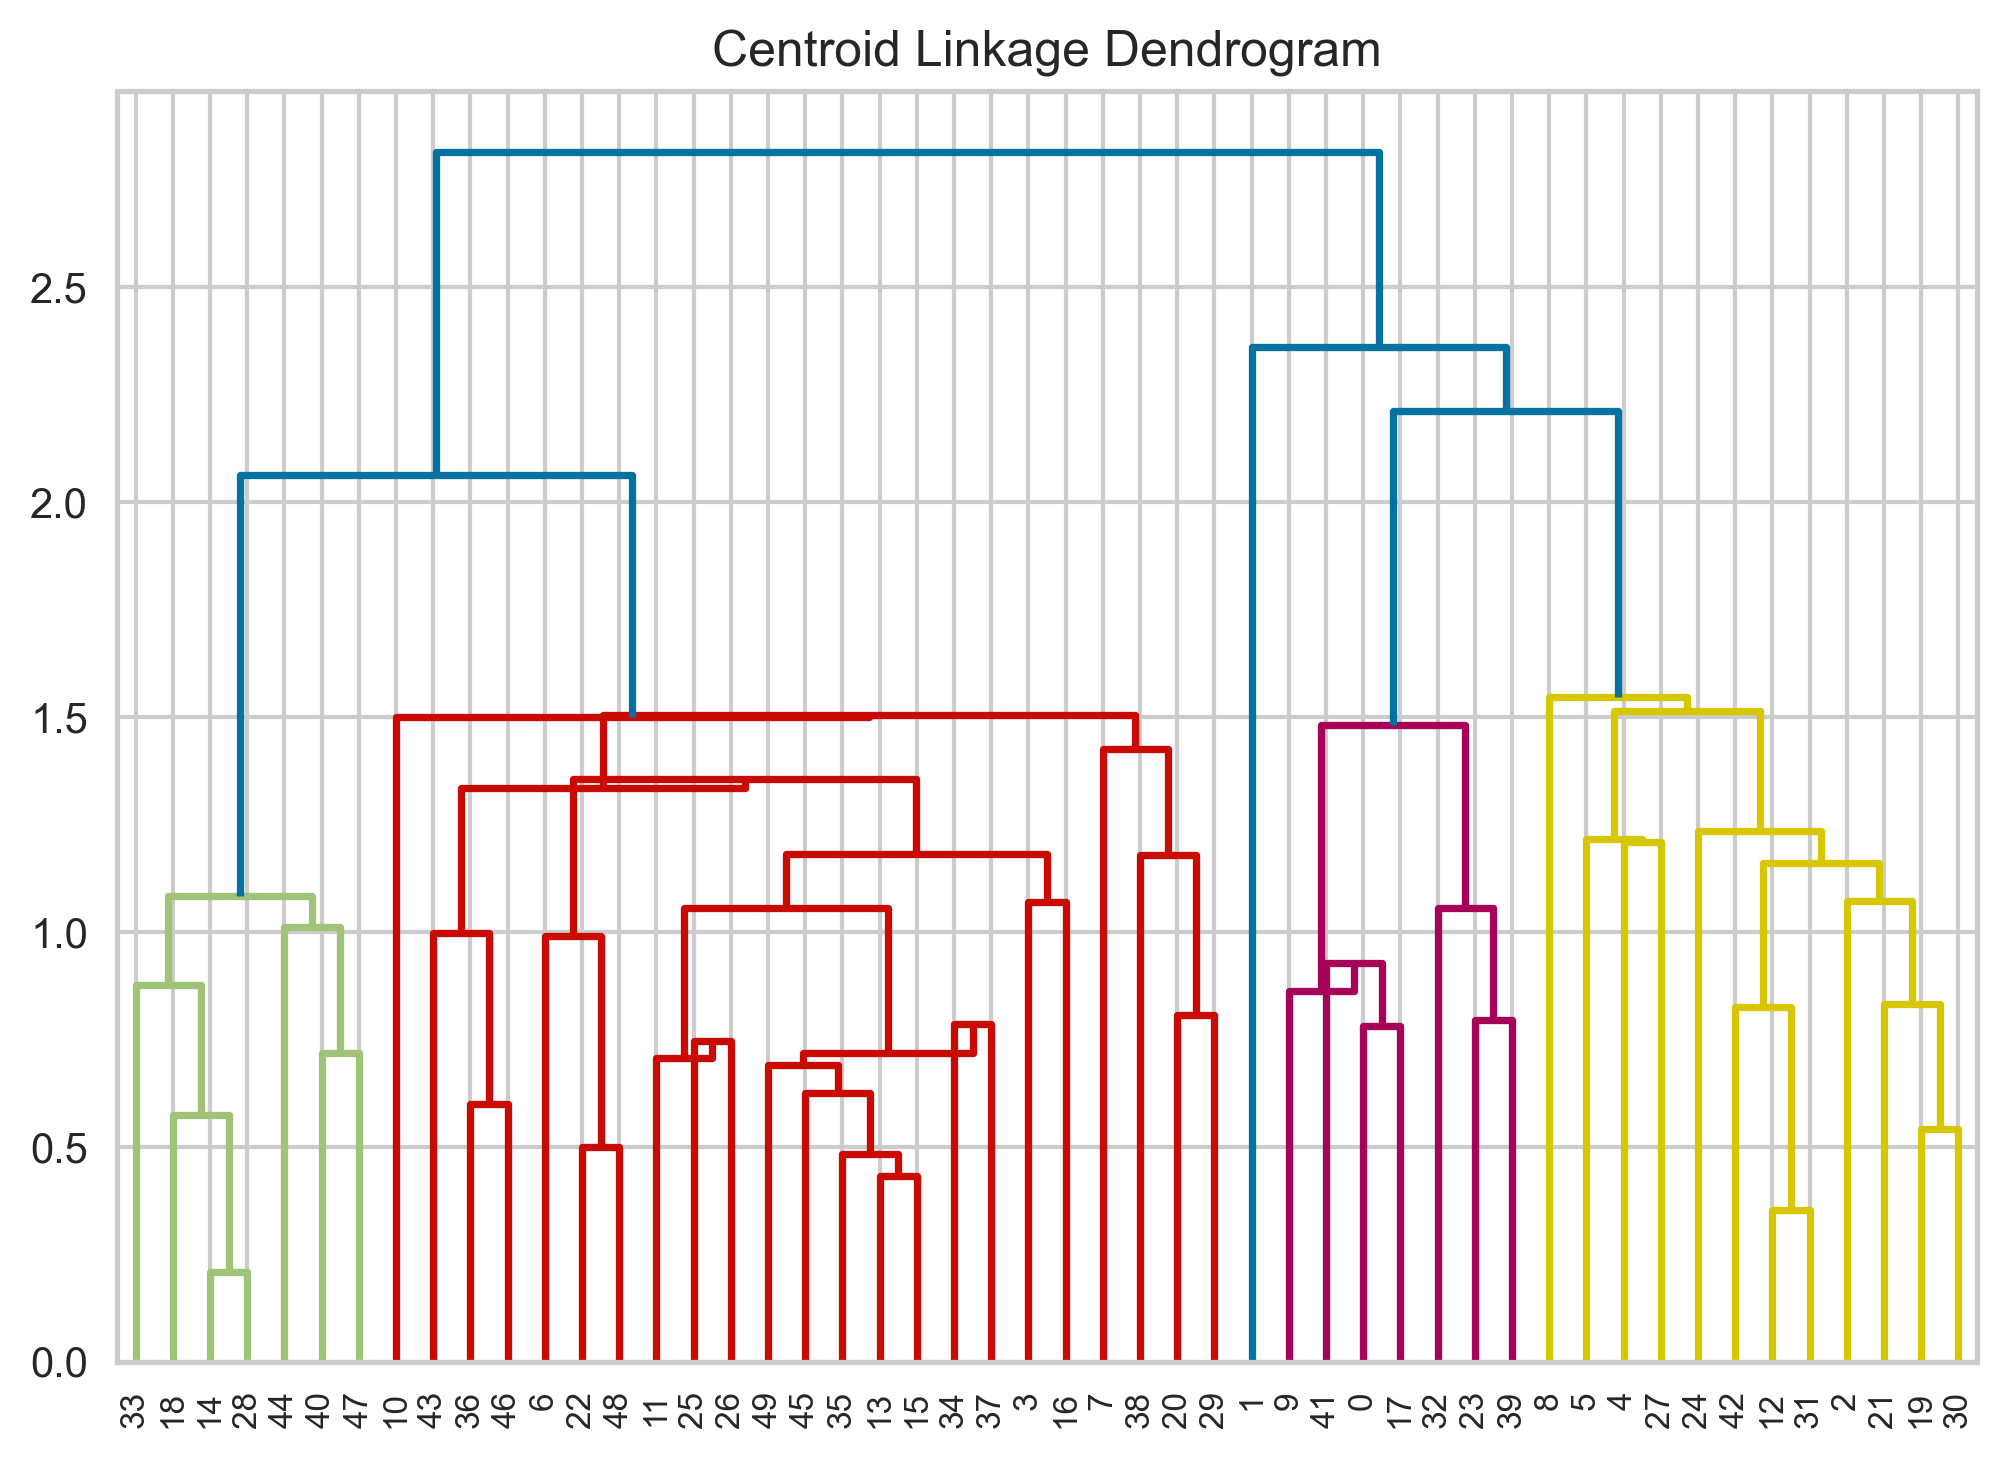

In [18]:
lk = hierarchy.linkage(x, method='centroid')
hierarchy.dendrogram(lk)
plt.title('Centroid Linkage Dendrogram')
plt.show()

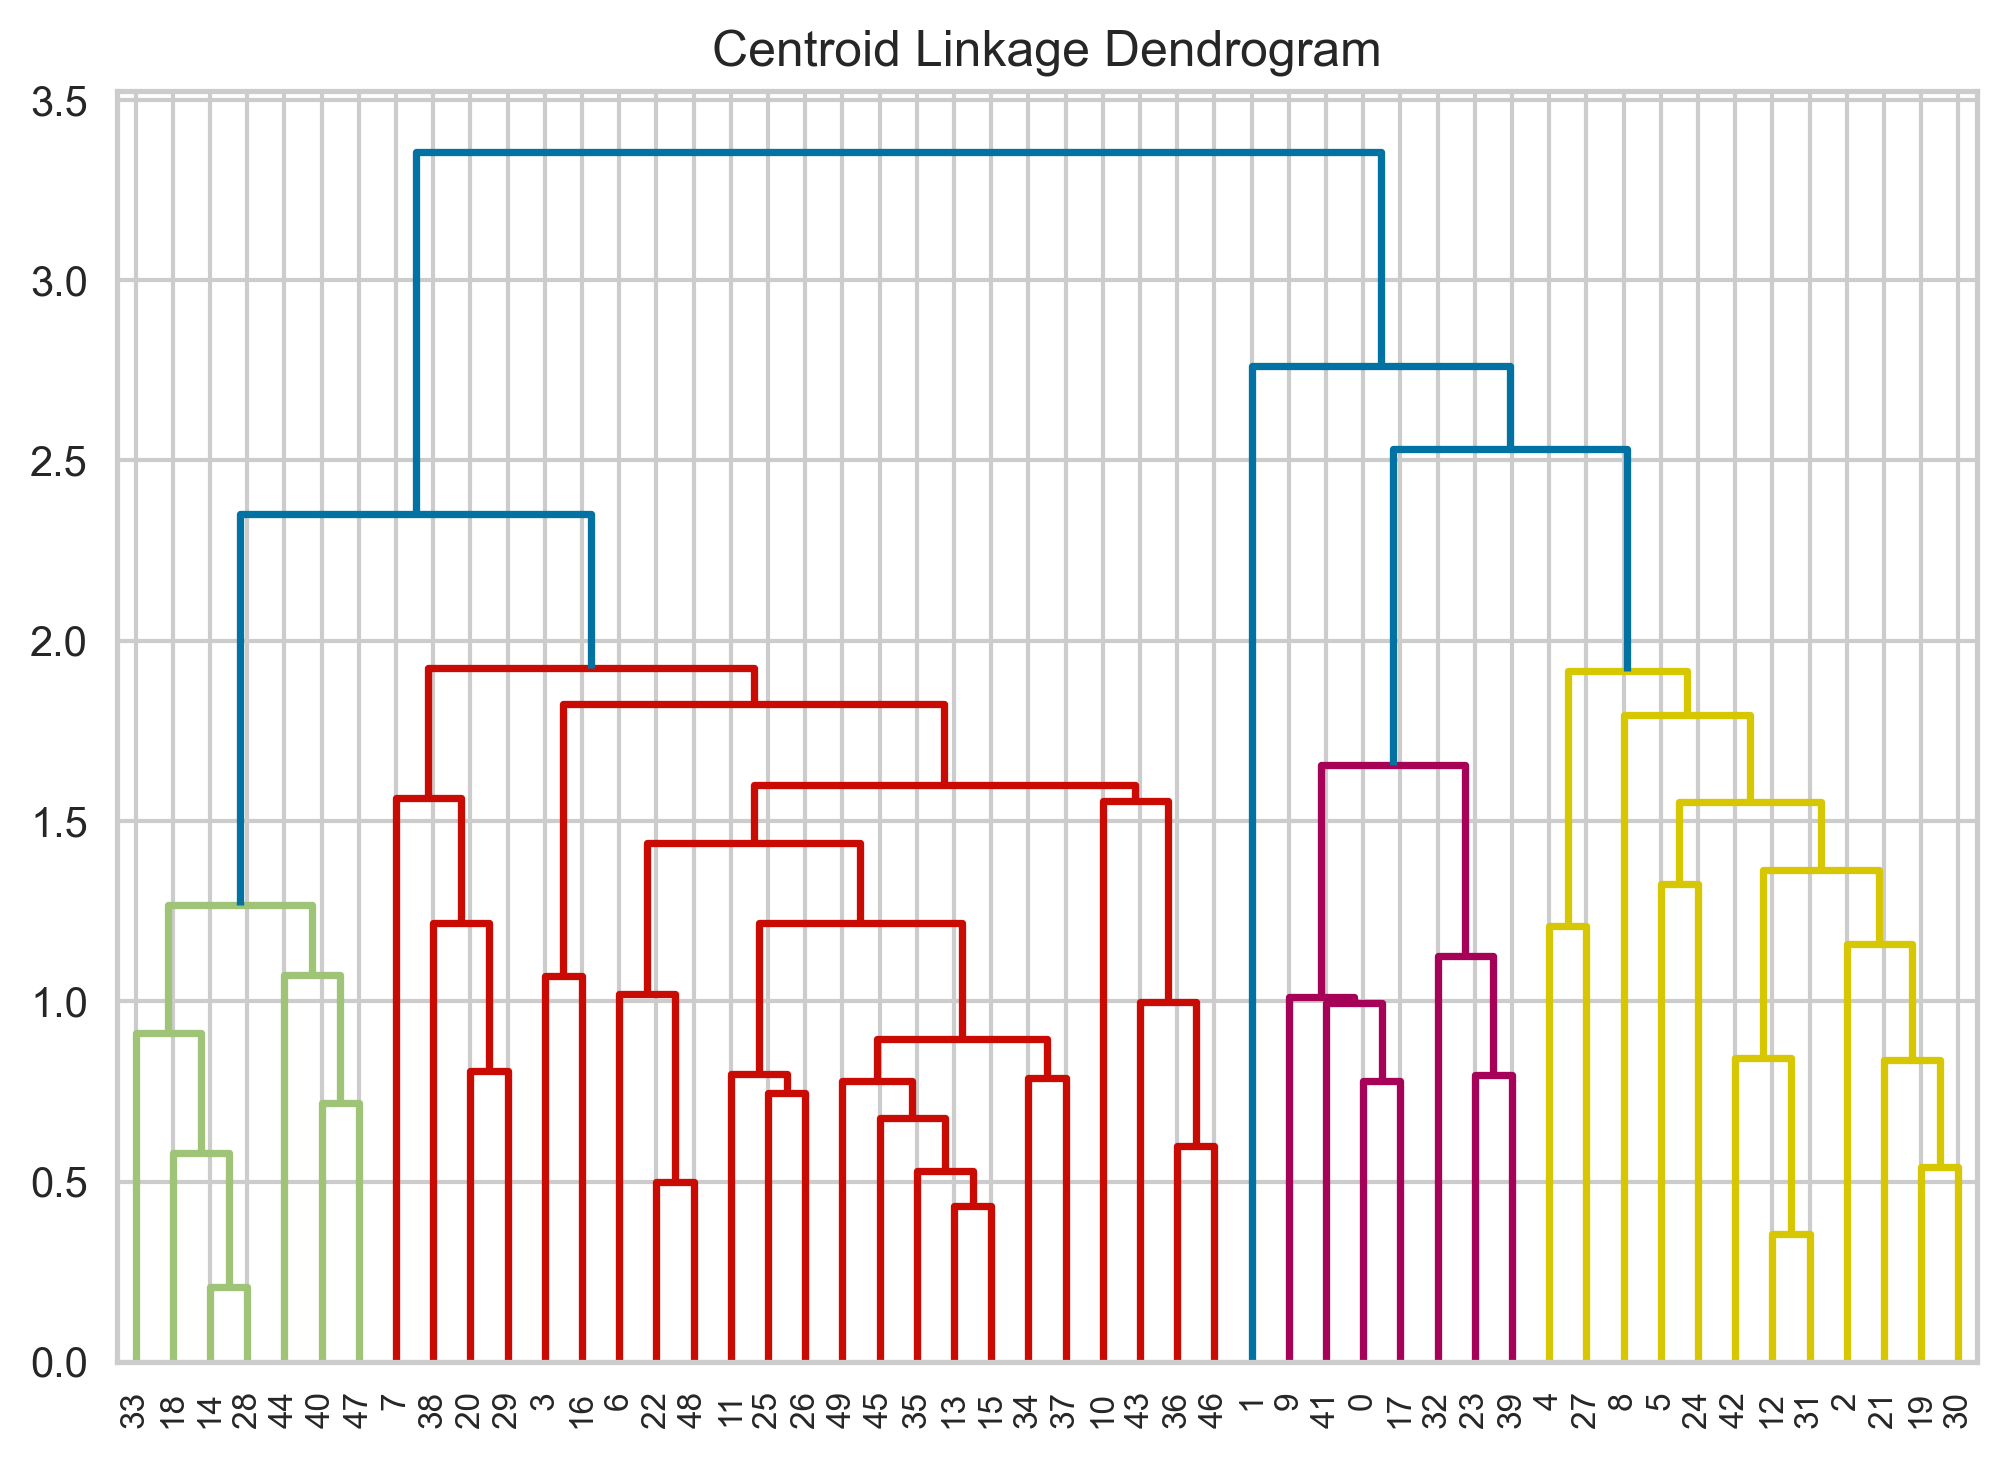

In [19]:
lk = hierarchy.linkage(x, method='average')
hierarchy.dendrogram(lk)
plt.title('Centroid Linkage Dendrogram')
plt.show()

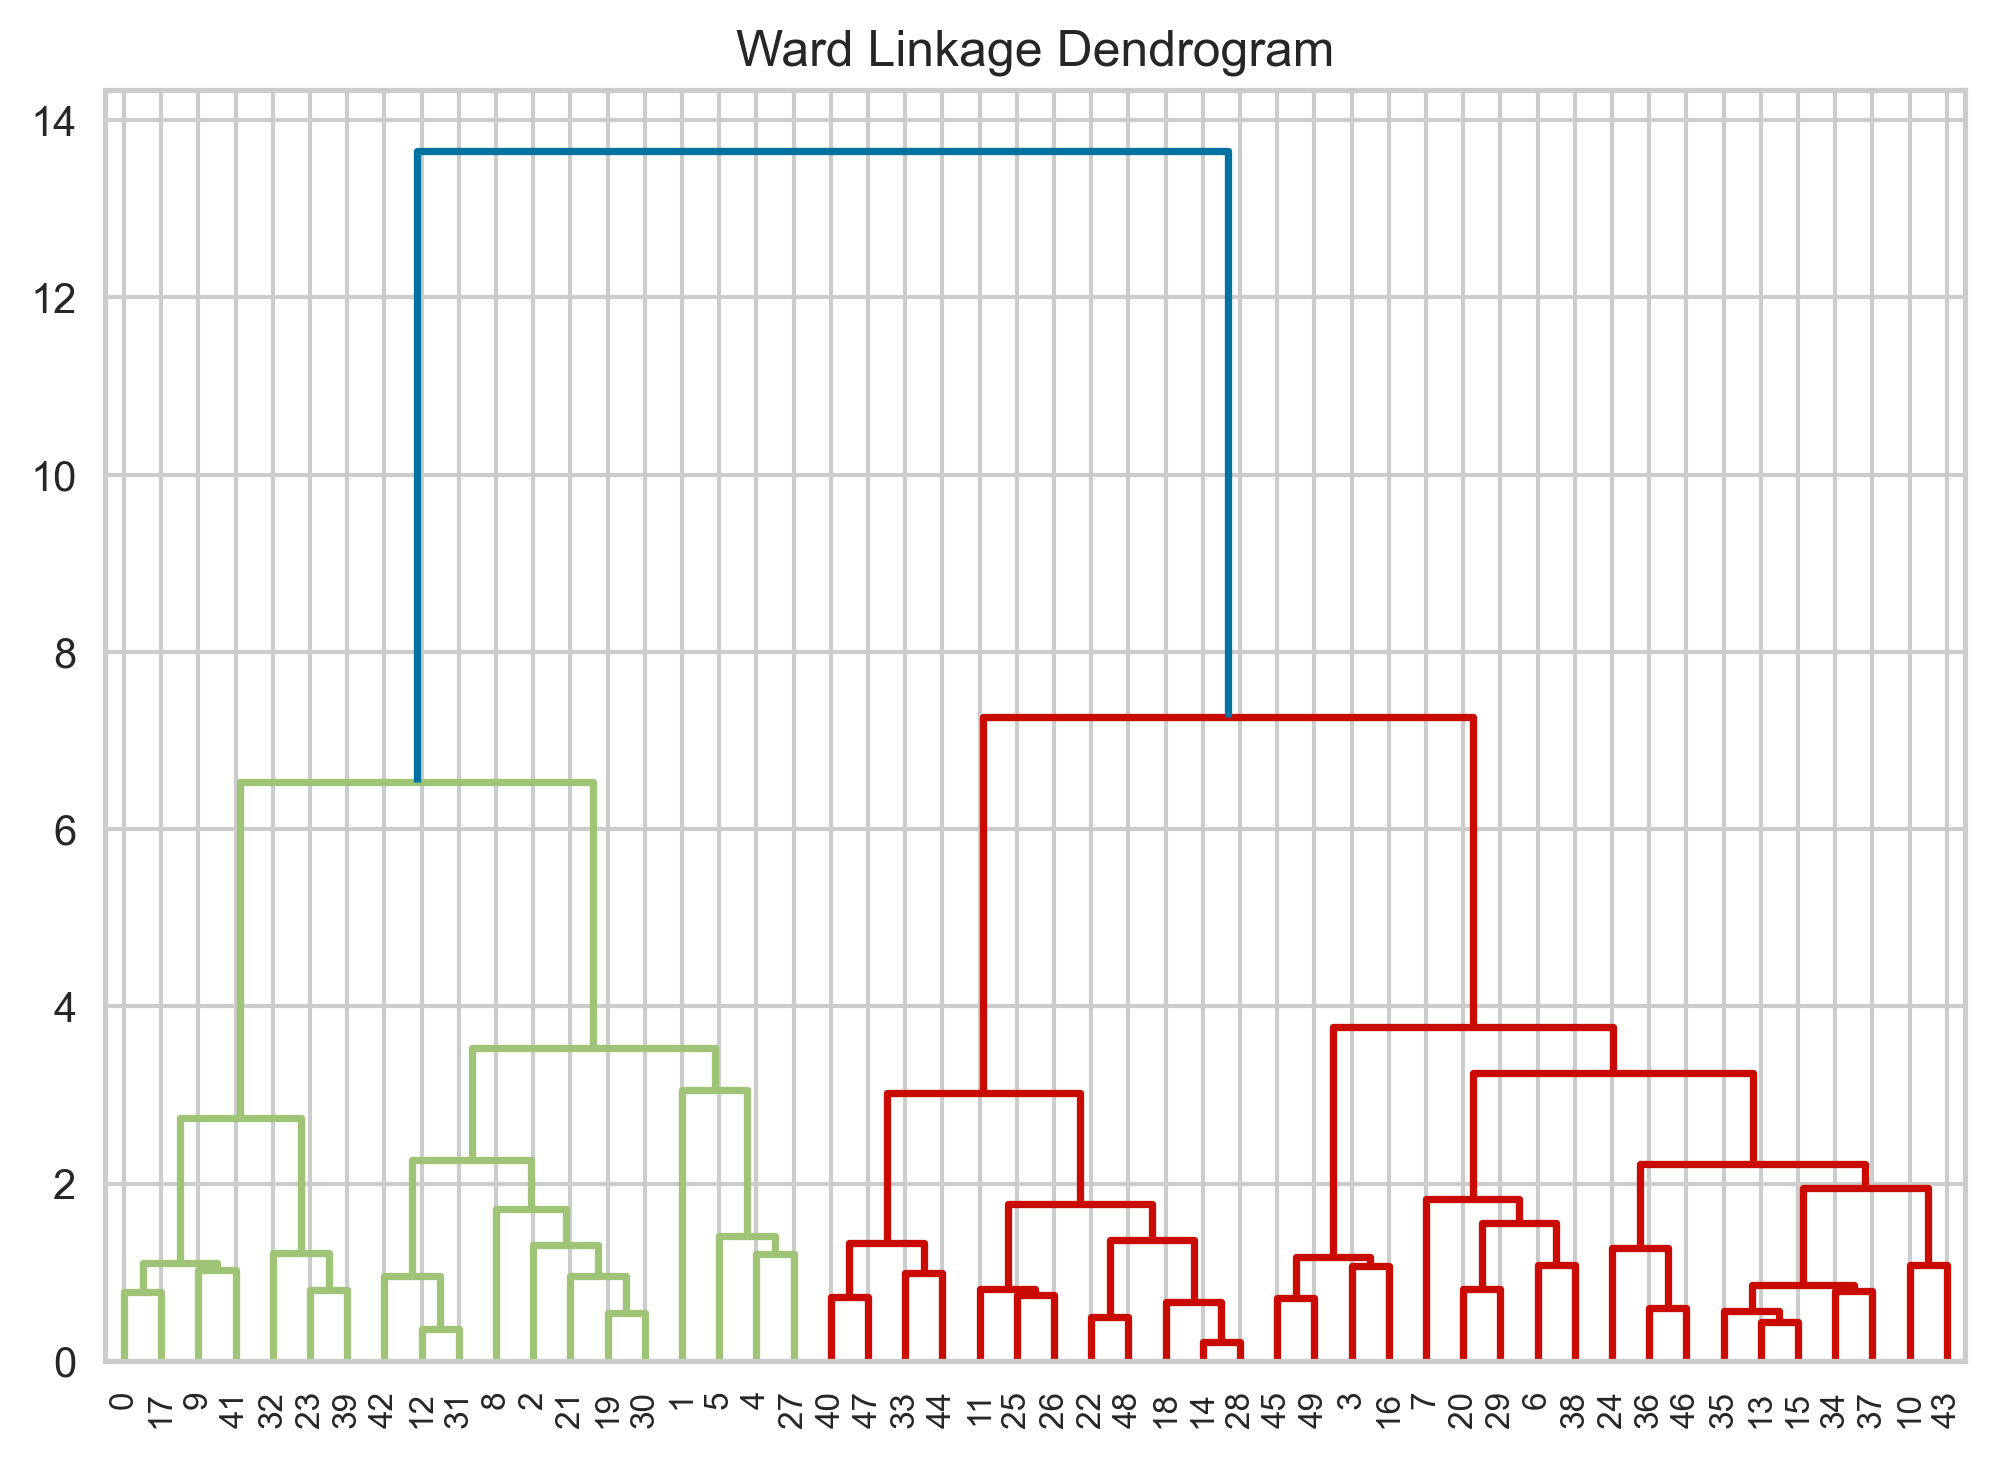

In [20]:
lk = hierarchy.linkage(x, method='ward')
hierarchy.dendrogram(lk)
plt.title('Ward Linkage Dendrogram')
plt.show()

- Ward's linkage is often a good default choice because it tends to produce well-balanced clusters, but it might not perform optimally for all datasets
- we define number of cluster from ward linkage Dendrogram 

In [21]:
# creating a model with hyperparameter - number of cluster = 3, affinity = 'euclidean', linkage = ward
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean',linkage='ward')
# fit & predict to have cluster labels
hc_pred = hc.fit_predict(x)

In [22]:
# printing cluster labels
hc_pred

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 0, 2, 0, 1, 0,
       2, 0, 1, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1,
       2, 1, 1, 2, 2, 1], dtype=int64)

## K-Means Clustering

In [23]:
# ftiitng k-means model on multiple values of K and finding its wcss(with cluster sum of sqaured variance)

wcss = []
k = range(1,11)
for i in  k:
    km = KMeans(n_clusters=i)
    km.fit(x)
    wcss.append(km.inertia_)
wcss

[200.0,
 104.96163315756871,
 80.0657554011071,
 57.55425863091104,
 49.993842813267484,
 45.676061461322405,
 40.27606123090887,
 35.670070271243674,
 31.873530587604748,
 28.276017469118685]

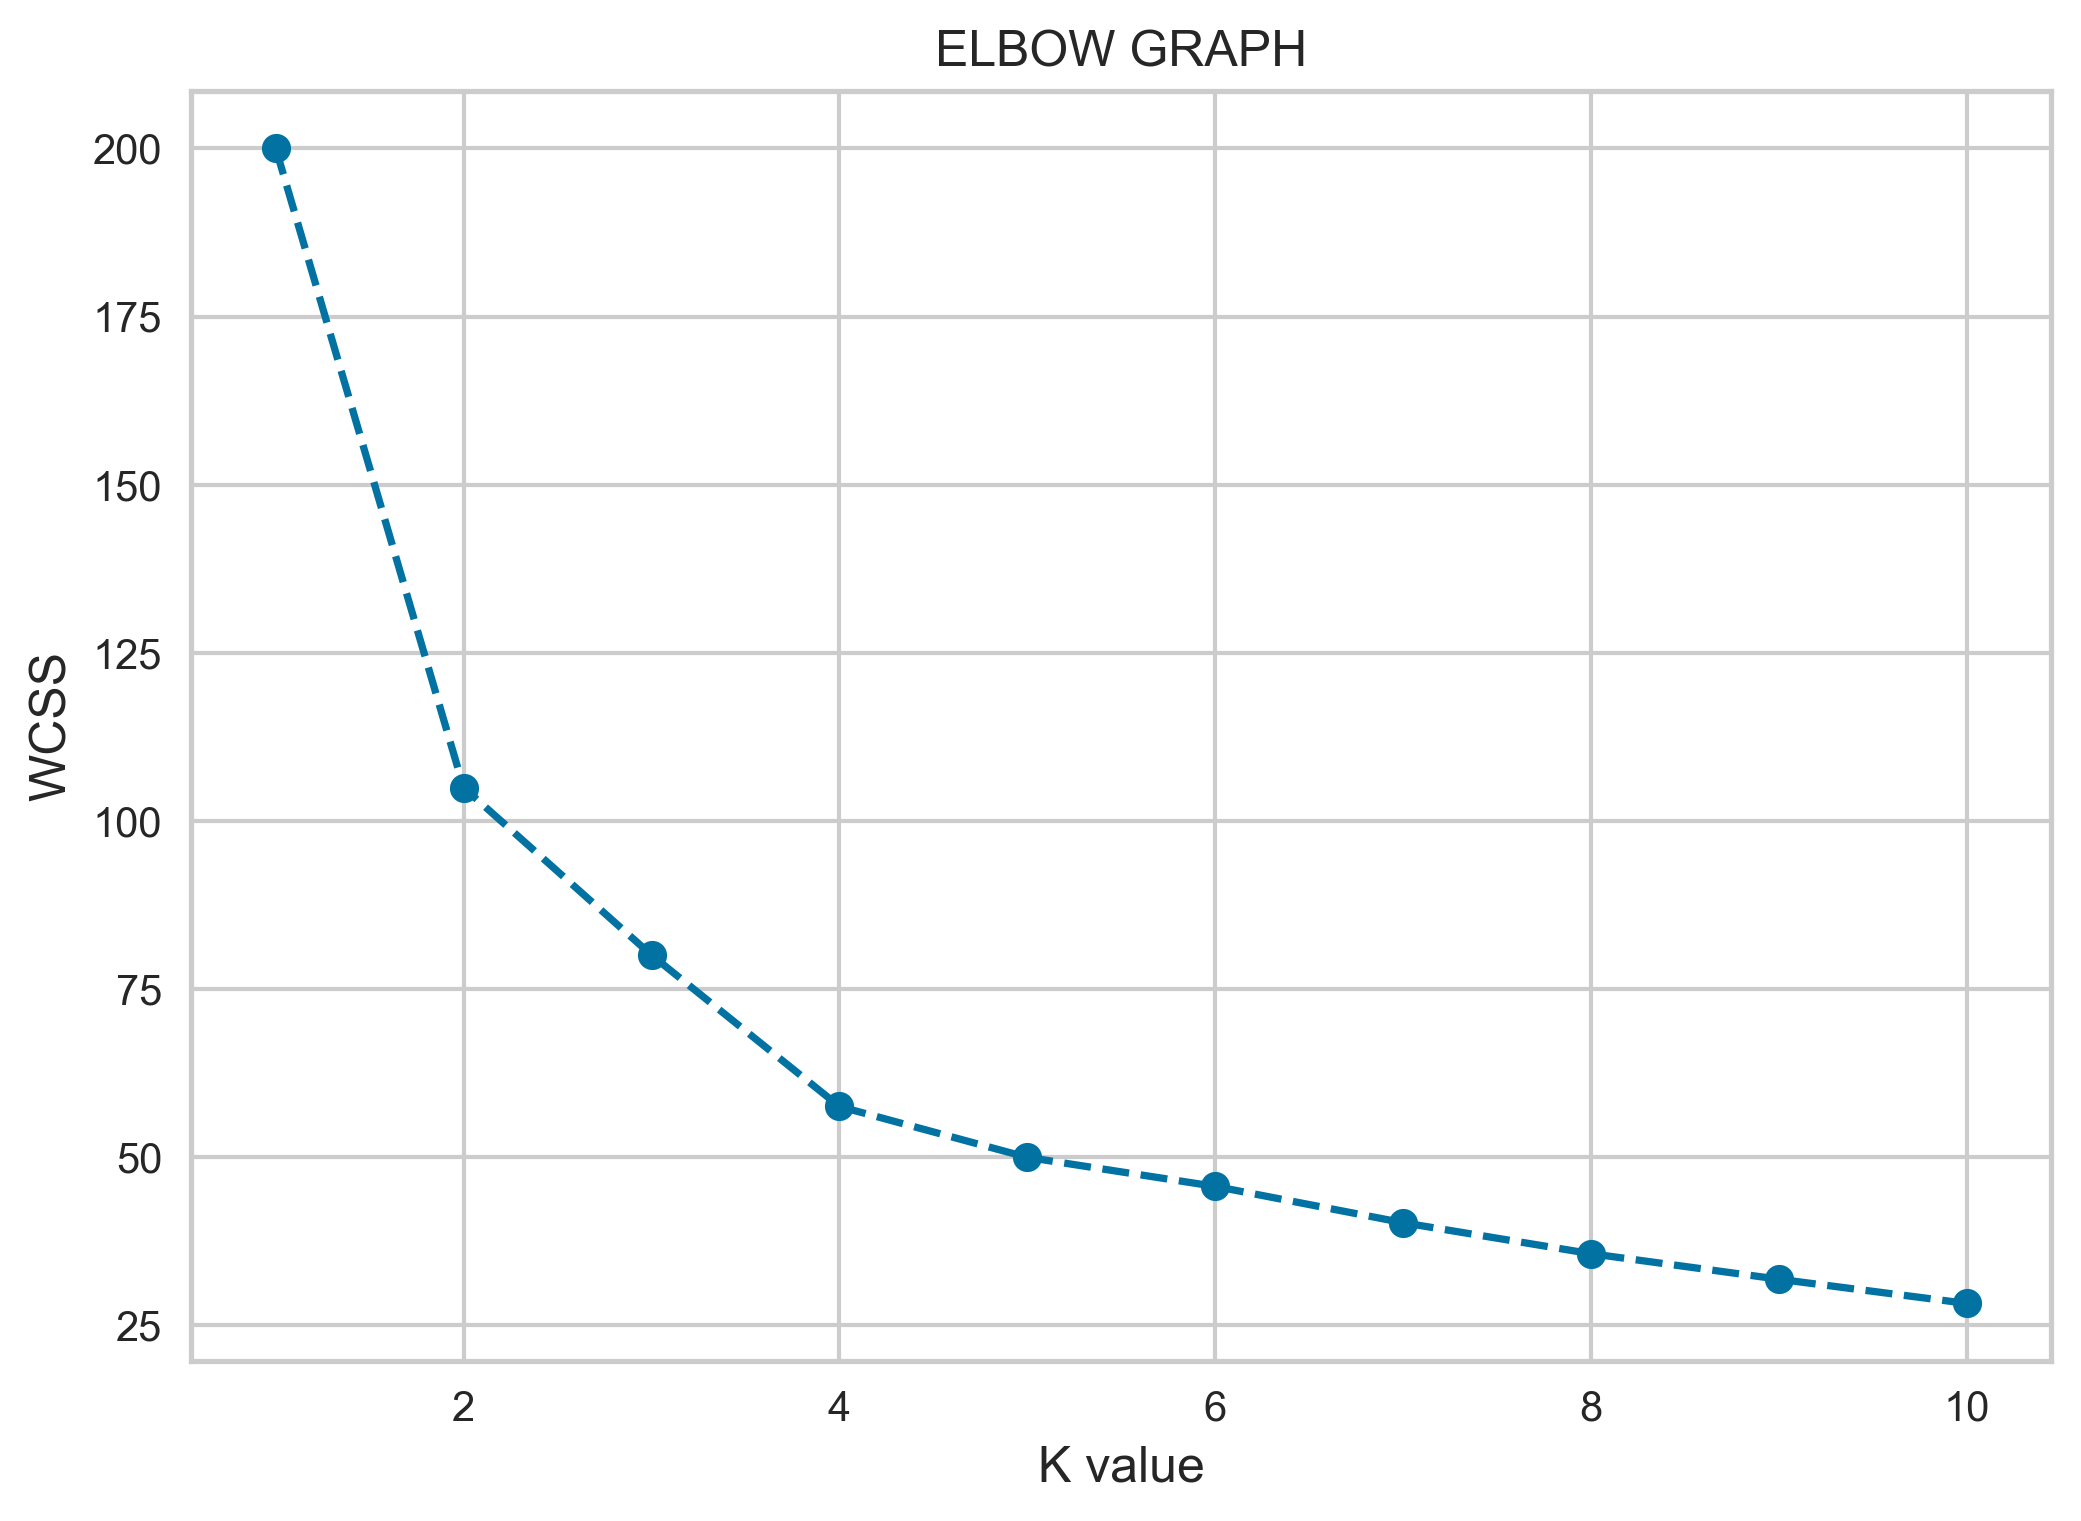

In [24]:
plt.plot(k, wcss, 'o--')
plt.title('ELBOW GRAPH')
plt.xlabel('K value')
plt.ylabel('WCSS')
plt.show()

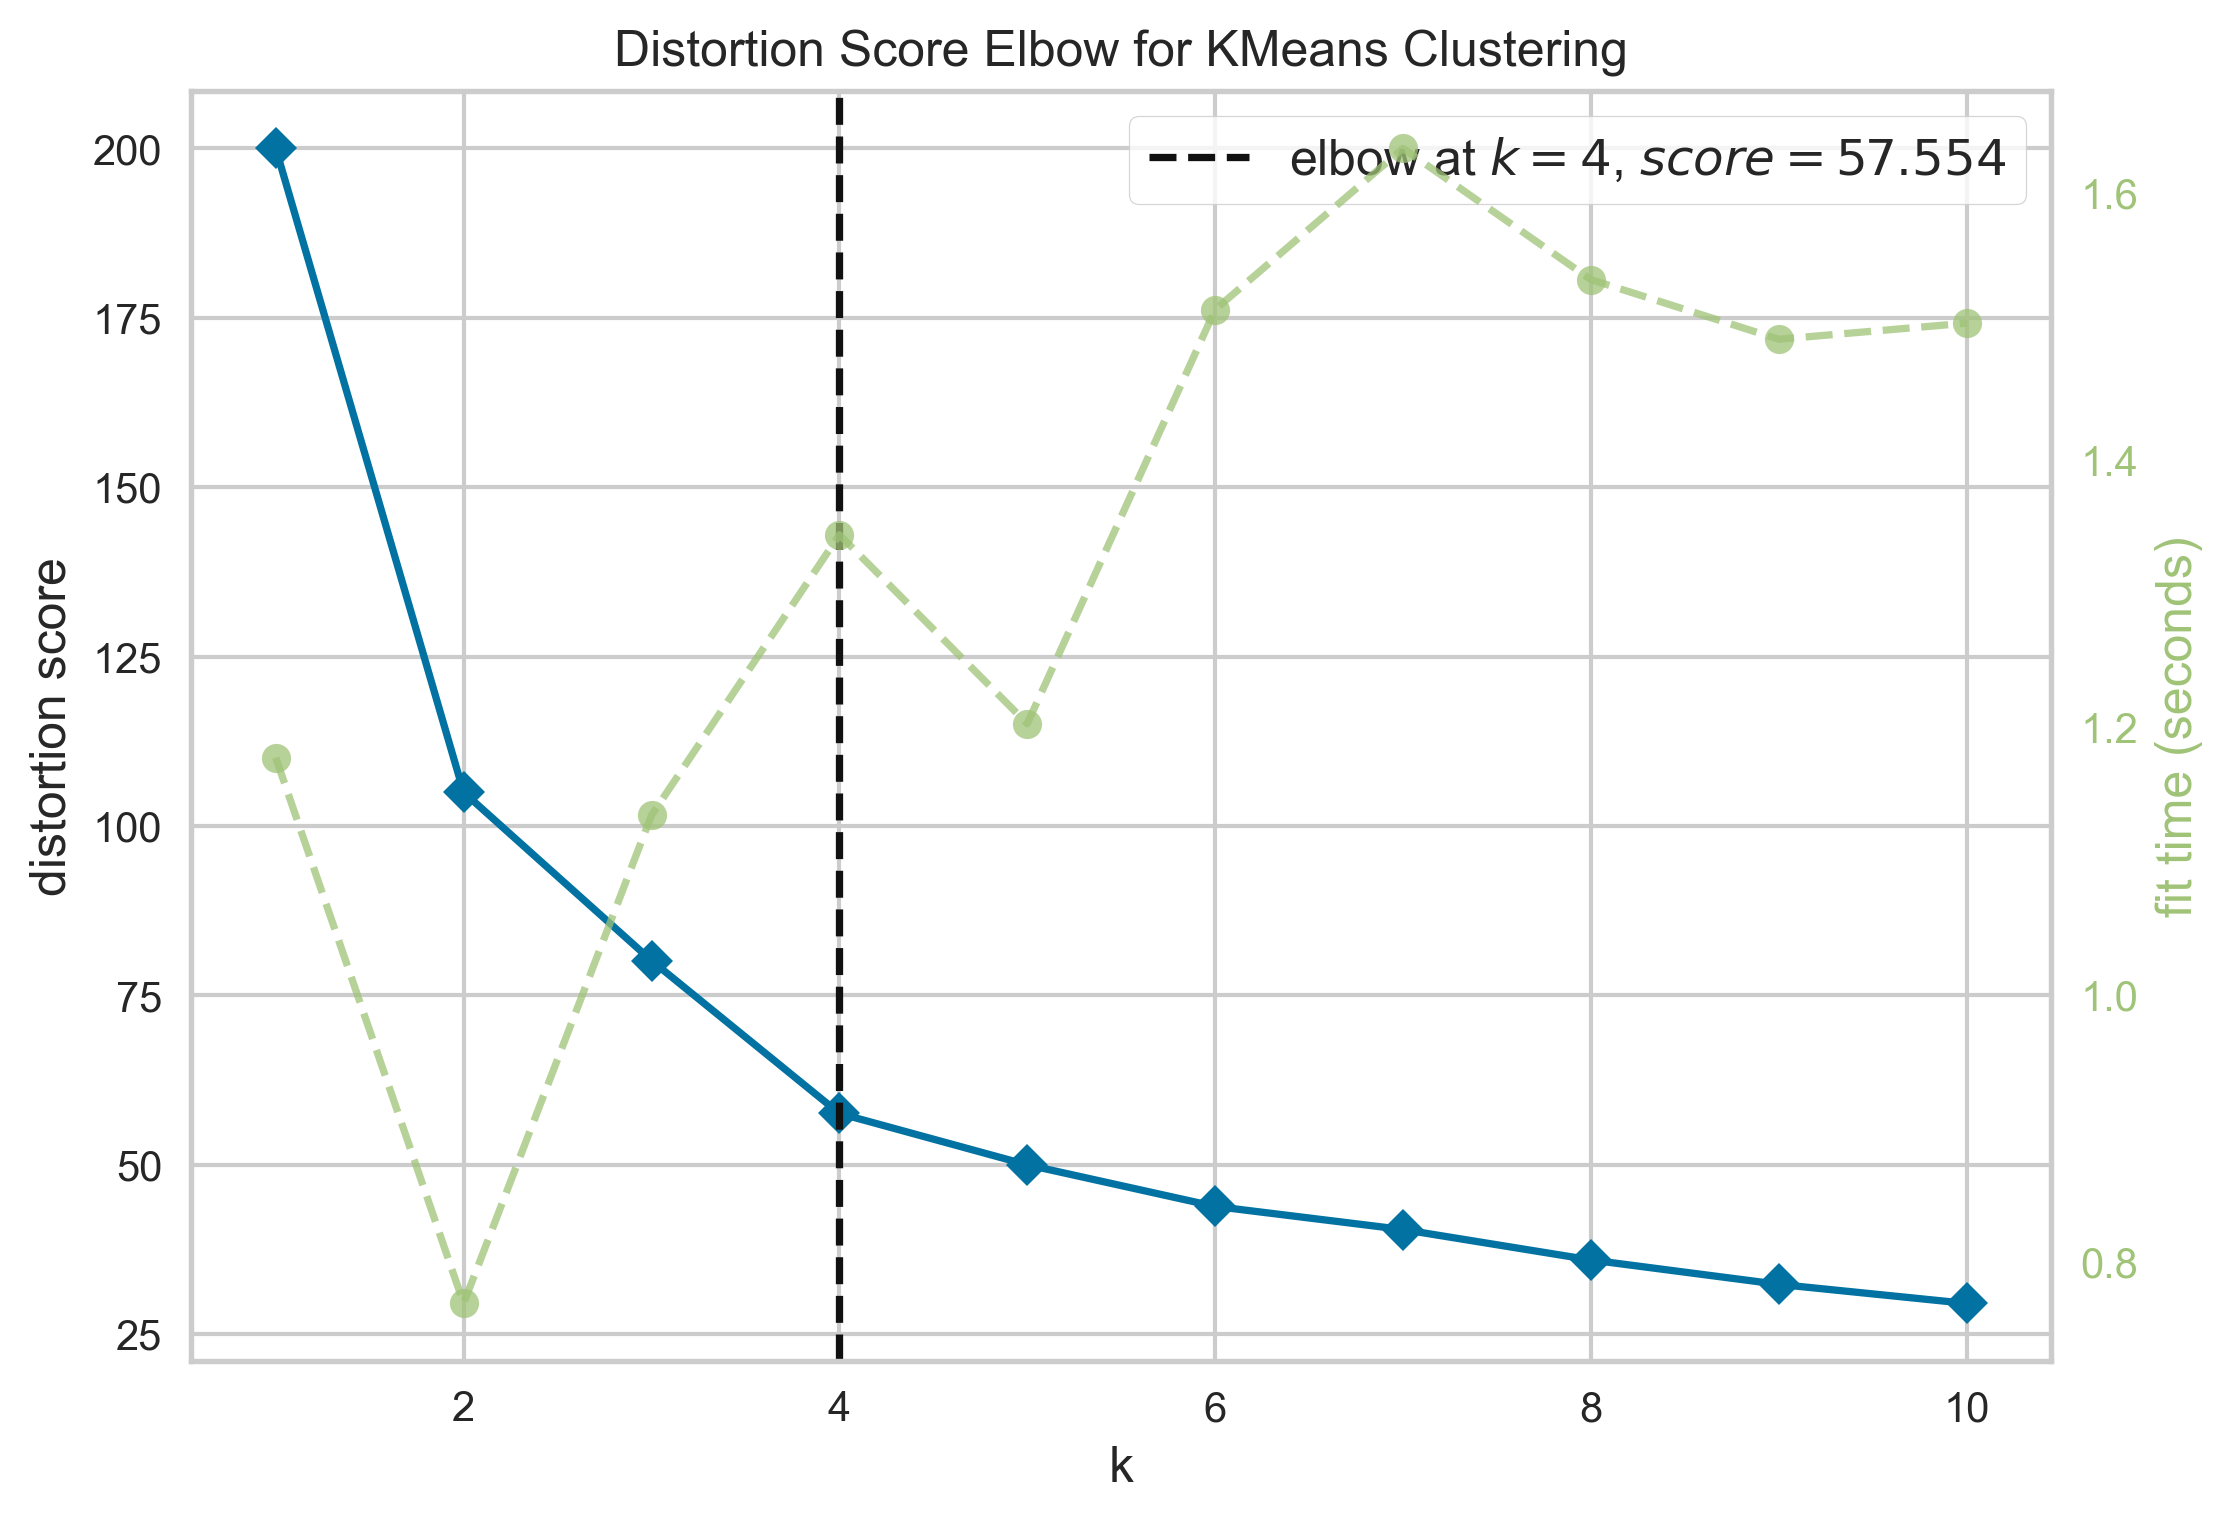

In [25]:
# alternative to elbow graph to find the optimal value of K
kmeans=KMeans()
visualizer=KElbowVisualizer(kmeans,k=(1,11))
visualizer.fit(x)
visualizer.poof()
plt.show()

In [26]:
# using Kneelocator class to find the optimal value for K by comparing multiple K vlaues & their respective wcss score
# direction is set to decreasing as the k increases the value of wcss decreases

lk = KneeLocator(k, wcss, curve='convex', direction='decreasing')
lk.elbow

4

In [27]:
# fitting the final K-means model using determined value of clusters

final_kmean = KMeans(n_clusters=4)
km_pred = final_kmean.fit_predict(x)
km_pred

array([3, 1, 1, 3, 1, 1, 2, 2, 1, 3, 2, 0, 1, 2, 0, 2, 0, 3, 0, 1, 2, 1,
       0, 3, 1, 0, 0, 1, 0, 2, 1, 1, 3, 0, 2, 2, 2, 2, 2, 3, 0, 3, 1, 2,
       0, 2, 2, 0, 0, 2])

In [28]:
final_kmean.labels_

array([3, 1, 1, 3, 1, 1, 2, 2, 1, 3, 2, 0, 1, 2, 0, 2, 0, 3, 0, 1, 2, 1,
       0, 3, 1, 0, 0, 1, 0, 2, 1, 1, 3, 0, 2, 2, 2, 2, 2, 3, 0, 3, 1, 2,
       0, 2, 2, 0, 0, 2])

## DBSCAN

In [33]:
dbscan2 = DBSCAN(eps=0.98, min_samples=3)
dbscan2.fit(x)

DBSCAN(eps=0.98, min_samples=3)

In [34]:
#Noisy samples are given the label -1.
dbscan2.labels_

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1,  0, -1,  1,  2,  1,  1,  1,  1,
        0,  1,  3,  1,  3,  1,  0, -1,  1,  1, -1,  1,  1,  3,  2, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0,  2,  1, -1,  1,  1,  1,  1,  1],
      dtype=int64)

In [35]:
c2 = pd.DataFrame(dbscan2.labels_,columns=['Cluster ID'])
c2.value_counts()

Cluster ID
 1            26
-1            12
 0             6
 2             3
 3             3
dtype: int64

In [36]:
crimes4 = pd.concat([df,c2],axis=1)
crimes4

,State,Murder,Assault,UrbanPop,Rape,Cluster ID
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,-1
3,Arkansas,8.8,190,50,19.5,-1
4,California,9.0,276,91,40.6,-1
5,Colorado,7.9,204,78,38.7,-1
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,-1
8,Florida,15.4,335,80,31.9,-1
9,Georgia,17.4,211,60,25.8,0
